**Automatic Loan Approval Predictor.**



>This dataset consists of more than 9,500 loans with information on the loan structure, the borrower, and whether the loan was pain back in full. This data was extracted from LendingClub.com, which is a company that connects borrowers with investors.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [ ]:
df=pd.read_csv('loan_data.csv')
df

credit.policy             purpose  int.rate  installment  \
0                 1  debt_consolidation    0.1189       829.10   
1                 1         credit_card    0.1071       228.22   
2                 1  debt_consolidation    0.1357       366.86   
3                 1  debt_consolidation    0.1008       162.34   
4                 1         credit_card    0.1426       102.92   
...             ...                 ...       ...          ...   
9573              0           all_other    0.1461       344.76   
9574              0           all_other    0.1253       257.70   
9575              0  debt_consolidation    0.1071        97.81   
9576              0    home_improvement    0.1600       351.58   
9577              0  debt_consolidation    0.1392       853.43   

      log.annual.inc    dti  fico  days.with.cr.line  revol.bal  revol.util  \
0          11.350407  19.48   737        5639.958333      28854        52.1   
1          11.082143  14.29   707        2760.000000      33623        76.7   
2          10.373491  11.63   682        4710.000000       3511        25.6   
3          11.350407   8.10   712        2699.958333      33667        73.2   
4          11.299732  14.97   667        4066.000000       4740        39.5   
...              ...    ...   ...                ...        ...         ...   
9573       12.180755  10.39   672       10474.000000     215372        82.1   
9574       11.141862   0.21   722        4380.000000        184         1.1   
9575       10.596635  13.09   687        3450.041667      10036        82.9   
9576       10.819778  19.18   692        1800.000000          0         3.2   
9577       11.264464  16.28   732        4740.000000      37879        57.0   

      inq.last.6mths  delinq.2yrs  pub.rec  not.fully.paid  
0                  0            0        0               0  
1                  0            0        0               0  
2                  1            0        0               0  
3                  1            0        0               0  
4                  0            1        0               0  
...              ...          ...      ...             ...  
9573               2            0        0               1  
9574               5            0        0               1  
9575               8            0        0               1  
9576               5            0        0               1  
9577               6            0        0               1  

[9578 rows x 14 columns]

**Variable	Explanation**


1.  **credit_policy**	1 if the customer meets the credit underwriting criteria; 0 otherwise.
2. **purpose**	The purpose of the loan.
3. **int_rate**	The interest rate of the loan (more risky borrowers are assigned higher interest rates).
4.	**installment**	The monthly installments owed by the borrower if the loan is funded.
5.	**log_annual_inc**	The natural log of the self-reported annual income of the borrower.
6.	**dti**	The debt-to-income ratio of the borrower (amount of debt divided by annual income).
7.	**fico**	The FICO credit score of the borrower.
8.	**days_with_cr_line**	The number of days the borrower has had a credit line.
9.	**revol_bal**	The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
10.	**revol_util**	The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
11.	**inq_last_6mths**	The borrower's number of inquiries by creditors in the last 6 months.
12.	**delinq_2yrs**	The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
13.	**pub_rec**	The borrower's number of derogatory public records.
14.	**not_fully_paid**	1 if the loan is not fully paid; 0 otherwise.

In [ ]:
pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 33.8 MB/s eta 0:00:00


In [ ]:
df.head(20) #top 20 rows of the data

credit.policy             purpose  int.rate  installment  log.annual.inc  \
0               1  debt_consolidation    0.1189       829.10       11.350407   
1               1         credit_card    0.1071       228.22       11.082143   
2               1  debt_consolidation    0.1357       366.86       10.373491   
3               1  debt_consolidation    0.1008       162.34       11.350407   
4               1         credit_card    0.1426       102.92       11.299732   
5               1         credit_card    0.0788       125.13       11.904968   
6               1  debt_consolidation    0.1496       194.02       10.714418   
7               1           all_other    0.1114       131.22       11.002100   
8               1    home_improvement    0.1134        87.19       11.407565   
9               1  debt_consolidation    0.1221        84.12       10.203592   
10              1  debt_consolidation    0.1347       360.43       10.434116   
11              1  debt_consolidation    0.1324       253.58       11.835009   
12              1  debt_consolidation    0.0859       316.11       10.933107   
13              1      small_business    0.0714        92.82       11.512925   
14              1  debt_consolidation    0.0863       209.54        9.487972   
15              1      major_purchase    0.1103       327.53       10.738915   
16              1           all_other    0.1317        77.69       10.522773   
17              1         credit_card    0.0894       476.58       11.608236   
18              1  debt_consolidation    0.1039       584.12       10.491274   
19              1      major_purchase    0.1513       173.65       11.002100   

      dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0   19.48   737        5639.958333      28854        52.1               0   
1   14.29   707        2760.000000      33623        76.7               0   
2   11.63   682        4710.000000       3511        25.6               1   
3    8.10   712        2699.958333      33667        73.2               1   
4   14.97   667        4066.000000       4740        39.5               0   
5   16.98   727        6120.041667      50807        51.0               0   
6    4.00   667        3180.041667       3839        76.8               0   
7   11.08   722        5116.000000      24220        68.6               0   
8   17.25   682        3989.000000      69909        51.1               1   
9   10.00   707        2730.041667       5630        23.0               1   
10  22.09   677        6713.041667      13846        71.0               2   
11   9.16   662        4298.000000       5122        18.2               2   
12  15.49   767        6519.958333       6068        16.7               0   
13   6.50   747        4384.000000       3021         4.8               0   
14   9.73   727        1559.958333       6282        44.6               0   
15  13.04   702        8159.958333       5394        53.4               1   
16   2.26   672        3895.958333       2211        88.4               0   
17   7.07   797        6510.958333       7586        52.7               1   
18   3.80   712        2760.000000       8311        59.8               0   
19   2.74   667        1126.958333        591        84.4               3   

    delinq.2yrs  pub.rec  not.fully.paid  
0             0        0               0  
1             0        0               0  
2             0        0               0  
3             0        0               0  
4             1        0               0  
5             0        0               0  
6             0        1               1  
7             0        0               1  
8             0        0               0  
9             0        0               0  
10            0        1               0  
11            1        0               0  
12            0        0               0  
13            1        0               0  
14            0        0               0  
15            0  

In [ ]:
df.tail(20) #last 10 rows of the data

credit.policy             purpose  int.rate  installment  \
9558              0  debt_consolidation    0.1533       696.57   
9559              0         credit_card    0.1273       688.11   
9560              0           all_other    0.1867       547.36   
9561              0           all_other    0.0788       115.74   
9562              0  debt_consolidation    0.1348       508.87   
9563              0  debt_consolidation    0.1099       556.50   
9564              0           all_other    0.1385       511.56   
9565              0           all_other    0.1459       396.35   
9566              0           all_other    0.2164       551.08   
9567              0           all_other    0.1311       101.24   
9568              0           all_other    0.1979        37.06   
9569              0    home_improvement    0.1426       823.34   
9570              0           all_other    0.1671       113.63   
9571              0           all_other    0.1568       161.01   
9572              0  debt_consolidation    0.1565        69.98   
9573              0           all_other    0.1461       344.76   
9574              0           all_other    0.1253       257.70   
9575              0  debt_consolidation    0.1071        97.81   
9576              0    home_improvement    0.1600       351.58   
9577              0  debt_consolidation    0.1392       853.43   

      log.annual.inc    dti  fico  days.with.cr.line  revol.bal  revol.util  \
9558       11.805595  17.21   682        2790.041667      38578        86.9   
9559       11.314475  21.13   732        5881.000000      35227        54.3   
9560       11.407565  15.76   667       10050.041670      13255        88.4   
9561       10.999095  10.17   722        4410.000000      11586        61.6   
9562       10.933107  17.76   717        3870.041667       8760        28.2   
9563       11.225243  17.84   727        6840.041667      18753        29.0   
9564       12.323856  12.33   687        6420.041667     385489        51.2   
9565       10.308953  21.04   697        3390.000000      26117        78.4   
9566       11.002100  24.06   662        1800.000000      16441        49.8   
9567       10.968198   8.23   687        2790.041667       1514        13.8   
9568       10.645425  22.17   667        5916.000000      28854        59.8   
9569       12.429216   3.62   722        3239.958333      33575        83.9   
9570       10.645425  28.06   672        3210.041667      25759        63.8   
9571       11.225243   8.00   677        7230.000000       6909        29.2   
9572       10.110472   7.02   662        8190.041667       2999        39.5   
9573       12.180755  10.39   672       10474.000000     215372        82.1   
9574       11.141862   0.21   722        4380.000000        184         1.1   
9575       10.596635  13.09   687        3450.041667      10036        82.9   
9576       10.819778  19.18   692        1800.000000          0         3.2   
9577       11.264464  16.28   732        4740.000000      37879        57.0   

      inq.last.6mths  delinq.2yrs  pub.rec  not.fully.paid  
9558               4            0        0               0  
9559               5            0        0               0  
9560               7            0        0               0  
9561               4            0        0               0  
9562               6            0        0               0  
9563               4            0        0               1  
9564               4            0        0               0  
9565               6            0        0               1  
9566               9            0        0               1  
9567               5            0        0               0  
9568               6            0        1               0  
9569               5            0        0               1  
9570               5            0        0               1  
9571               4            0        1               1  
9572               6            0        0  

**General Description **

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [ ]:
df.columns #columns of the data

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [ ]:
df.describe(include=['object']) #description of the data type object

purpose
count                 9578
unique                   7
top     debt_consolidation
freq                  3957

In [ ]:
df.describe().T # statistical summary of the data

count          mean           std         min  \
credit.policy      9578.0      0.804970      0.396245    0.000000   
int.rate           9578.0      0.122640      0.026847    0.060000   
installment        9578.0    319.089413    207.071301   15.670000   
log.annual.inc     9578.0     10.932117      0.614813    7.547502   
dti                9578.0     12.606679      6.883970    0.000000   
fico               9578.0    710.846314     37.970537  612.000000   
days.with.cr.line  9578.0   4560.767197   2496.930377  178.958333   
revol.bal          9578.0  16913.963876  33756.189557    0.000000   
revol.util         9578.0     46.799236     29.014417    0.000000   
inq.last.6mths     9578.0      1.577469      2.200245    0.000000   
delinq.2yrs        9578.0      0.163708      0.546215    0.000000   
pub.rec            9578.0      0.062122      0.262126    0.000000   
not.fully.paid     9578.0      0.160054      0.366676    0.000000   

                           25%          50%           75%           max  
credit.policy         1.000000     1.000000      1.000000  1.000000e+00  
int.rate              0.103900     0.122100      0.140700  2.164000e-01  
installment         163.770000   268.950000    432.762500  9.401400e+02  
log.annual.inc       10.558414    10.928884     11.291293  1.452835e+01  
dti                   7.212500    12.665000     17.950000  2.996000e+01  
fico                682.000000   707.000000    737.000000  8.270000e+02  
days.with.cr.line  2820.000000  4139.958333   5730.000000  1.763996e+04  
revol.bal          3187.000000  8596.000000  18249.500000  1.207359e+06  
revol.util           22.600000    46.300000     70.900000  1.190000e+02  
inq.last.6mths        0.000000     1.000000      2.000000  3.300000e+01  
delinq.2yrs           0.000000     0.000000      0.000000  1.300000e+01  
pub.rec               0.000000     0.000000      0.000000  5.000000e+00  
not.fully.paid        0.000000     0.000000      0.000000  1.000000e+00

In [ ]:
df['credit.policy']=df['credit.policy'].astype(int)
df['credit.policy']

0       1
1       1
2       1
3       1
4       1
       ..
9573    0
9574    0
9575    0
9576    0
9577    0
Name: credit.policy, Length: 9578, dtype: int64

In [ ]:
df.groupby(['not.fully.paid','purpose']).nunique()

credit.policy  int.rate  installment  \
not.fully.paid purpose                                                    
0              all_other                       2       197         1381   
               credit_card                     2       176          919   
               debt_consolidation              2       229         2166   
               educational                     2       106          251   
               home_improvement                2       124          435   
               major_purchase                  2       106          340   
               small_business                  2       121          389   
1              all_other                       2       136          363   
               credit_card                     2        93          145   
               debt_consolidation              2       167          539   
               educational                     2        53           69   
               home_improvement                2        66          106   
               major_purchase                  2        35           48   
               small_business                  2        99          166   

                                   log.annual.inc   dti  fico  \
not.fully.paid purpose                                          
0              all_other                      671  1311    38   
               credit_card                    390   892    37   
               debt_consolidation             949  1801    41   
               educational                    152   256    34   
               home_improvement               258   463    37   
               major_purchase                 208   362    35   
               small_business                 192   405    35   
1              all_other                      214   353    33   
               credit_card                     95   143    27   
               debt_consolidation             271   517    34   
               educational                     58    66    25   
               home_improvement                86   105    31   
               major_purchase                  43    48    23   
               small_business                 102   169    32   

                                   days.with.cr.line  revol.bal  revol.util  \
not.fully.paid purpose                                                        
0              all_other                        1023       1728         817   
               credit_card                       729       1081         649   
               debt_consolidation               1345       3129         959   
               educational                       241        250         224   
               home_improvement                  409        487         373   
               major_purchase                    327        363         305   
               small_business                    389        429         334   
1              all_other                         296        357         321   
               credit_card                       135        144         132   
               debt_consolidation                440        588         457   
               educational                        66         63          60   
               home_improvement                  100        102          96   
               major_purchase                     47         44          44   
               small_business                    162        169         149   

                                   inq.last.6mths  delinq.2yrs  pub.rec  
not.fully.paid purpose                                                   
0              all_other                       17            8        4  
               credit_card                     15            6        5  
               debt_consolidation              18           10        4  
               educational                     13            4        2  
               home_improvement                14            5        4  
          

In [ ]:
df['credit.policy'].value_counts()

1    7710
0    1868
Name: credit.policy, dtype: int64

In [ ]:
df['int.rate'].describe()

count    9578.000000
mean        0.122640
std         0.026847
min         0.060000
25%         0.103900
50%         0.122100
75%         0.140700
max         0.216400
Name: int.rate, dtype: float64

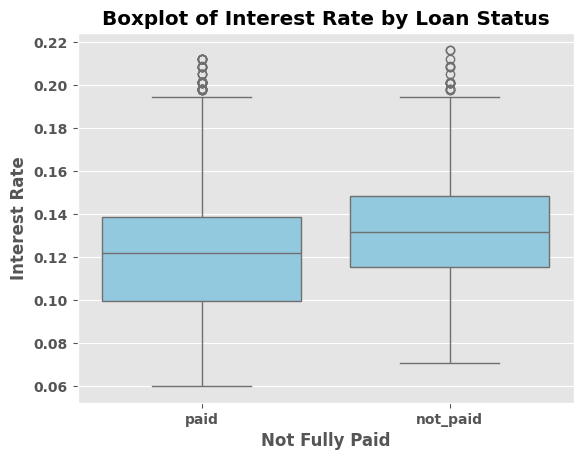

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='not.fully.paid', y='int.rate', data=df, color='skyblue')
plt.xlabel('Not Fully Paid',fontweight='bold')
plt.ylabel('Interest Rate',fontweight='bold')
plt.title('Boxplot of Interest Rate by Loan Status',fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
xtick = [0,1]
xlab = ["paid", "not_paid"]

plt.xticks(xtick, xlab)

plt.show()


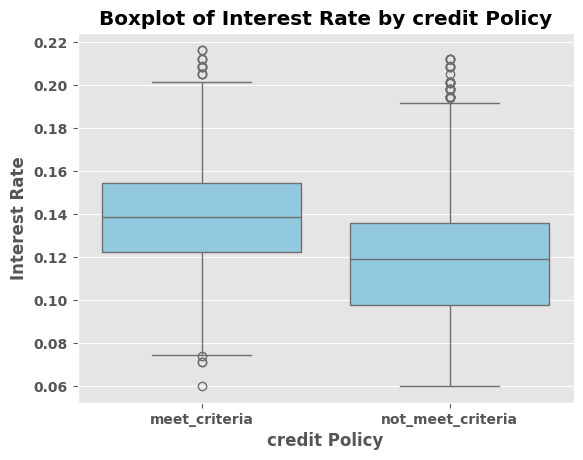

In [ ]:
sns.boxplot(x='credit.policy', y='int.rate', data=df, color='skyblue')
plt.xlabel('credit Policy',fontweight='bold')
plt.ylabel('Interest Rate',fontweight='bold')
plt.title('Boxplot of Interest Rate by credit Policy',fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
xtick = [0,1]
xlab = ["meet_criteria", "not_meet_criteria"]

plt.xticks(xtick, xlab)

plt.show()


In [ ]:
df.groupby('credit.policy')['int.rate'].describe()

count      mean       std   min     25%     50%     75%  \
credit.policy                                                             
0              1868.0  0.138680  0.026032  0.06  0.1222  0.1387  0.1545   
1              7710.0  0.118754  0.025571  0.06  0.0976  0.1189  0.1357   

                  max  
credit.policy          
0              0.2164  
1              0.2121

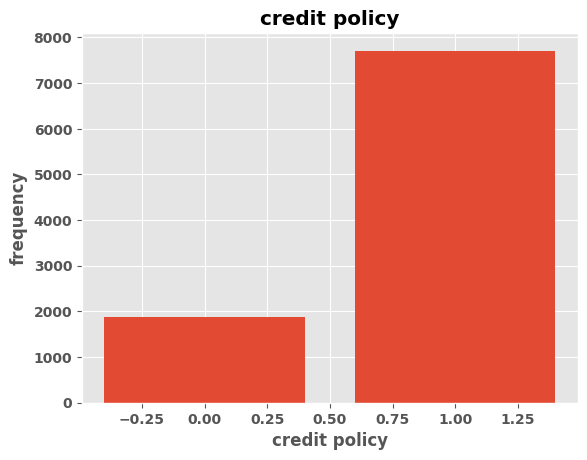

In [ ]:
plt.bar(df['credit.policy'].unique(), df['credit.policy'].value_counts())
plt.title('credit policy',fontweight='bold')
plt.xlabel('credit policy',fontweight='bold')
plt.ylabel('frequency',fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.show()


In [ ]:
df['credit.policy'].value_counts()

1    7710
0    1868
Name: credit.policy, dtype: int64

In [ ]:
df['credit.policy'].unique()

array([1, 0])

In [ ]:
df.nunique() #unique values of the data

credit.policy           2
purpose                 7
int.rate              249
installment          4788
log.annual.inc       1987
dti                  2529
fico                   44
days.with.cr.line    2687
revol.bal            7869
revol.util           1035
inq.last.6mths         28
delinq.2yrs            11
pub.rec                 6
not.fully.paid          2
col                     2
dtype: int64

In [ ]:
df.shape #shape of the data

(9578, 15)

In [ ]:
df.size #size of the data

143670

In [ ]:
print(df['purpose'].unique()) #unique category of the data
print(df['purpose'].value_counts()) #unique values of the data
print(df['purpose'].value_counts(normalize=True)) #unique values in %.

['debt_consolidation' 'credit_card' 'all_other' 'home_improvement'
 'small_business' 'major_purchase' 'educational']
debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64
debt_consolidation    0.413134
all_other             0.243370
credit_card           0.131760
home_improvement      0.065671
small_business        0.064627
major_purchase        0.045625
educational           0.035811
Name: purpose, dtype: float64


In [ ]:
print(df['credit.policy'].unique()) #unique values in the credit policy column
print(df['credit.policy'].value_counts()) # frequency of the categories
print(df['credit.policy'].value_counts(normalize=True)) #% of the categories



[1 0]
1    7710
0    1868
Name: credit.policy, dtype: int64
1    0.80497
0    0.19503
Name: credit.policy, dtype: float64


In [ ]:
df.isnull().sum() #null values in data

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
col                  0
dtype: int64

**Distribution of the variables**

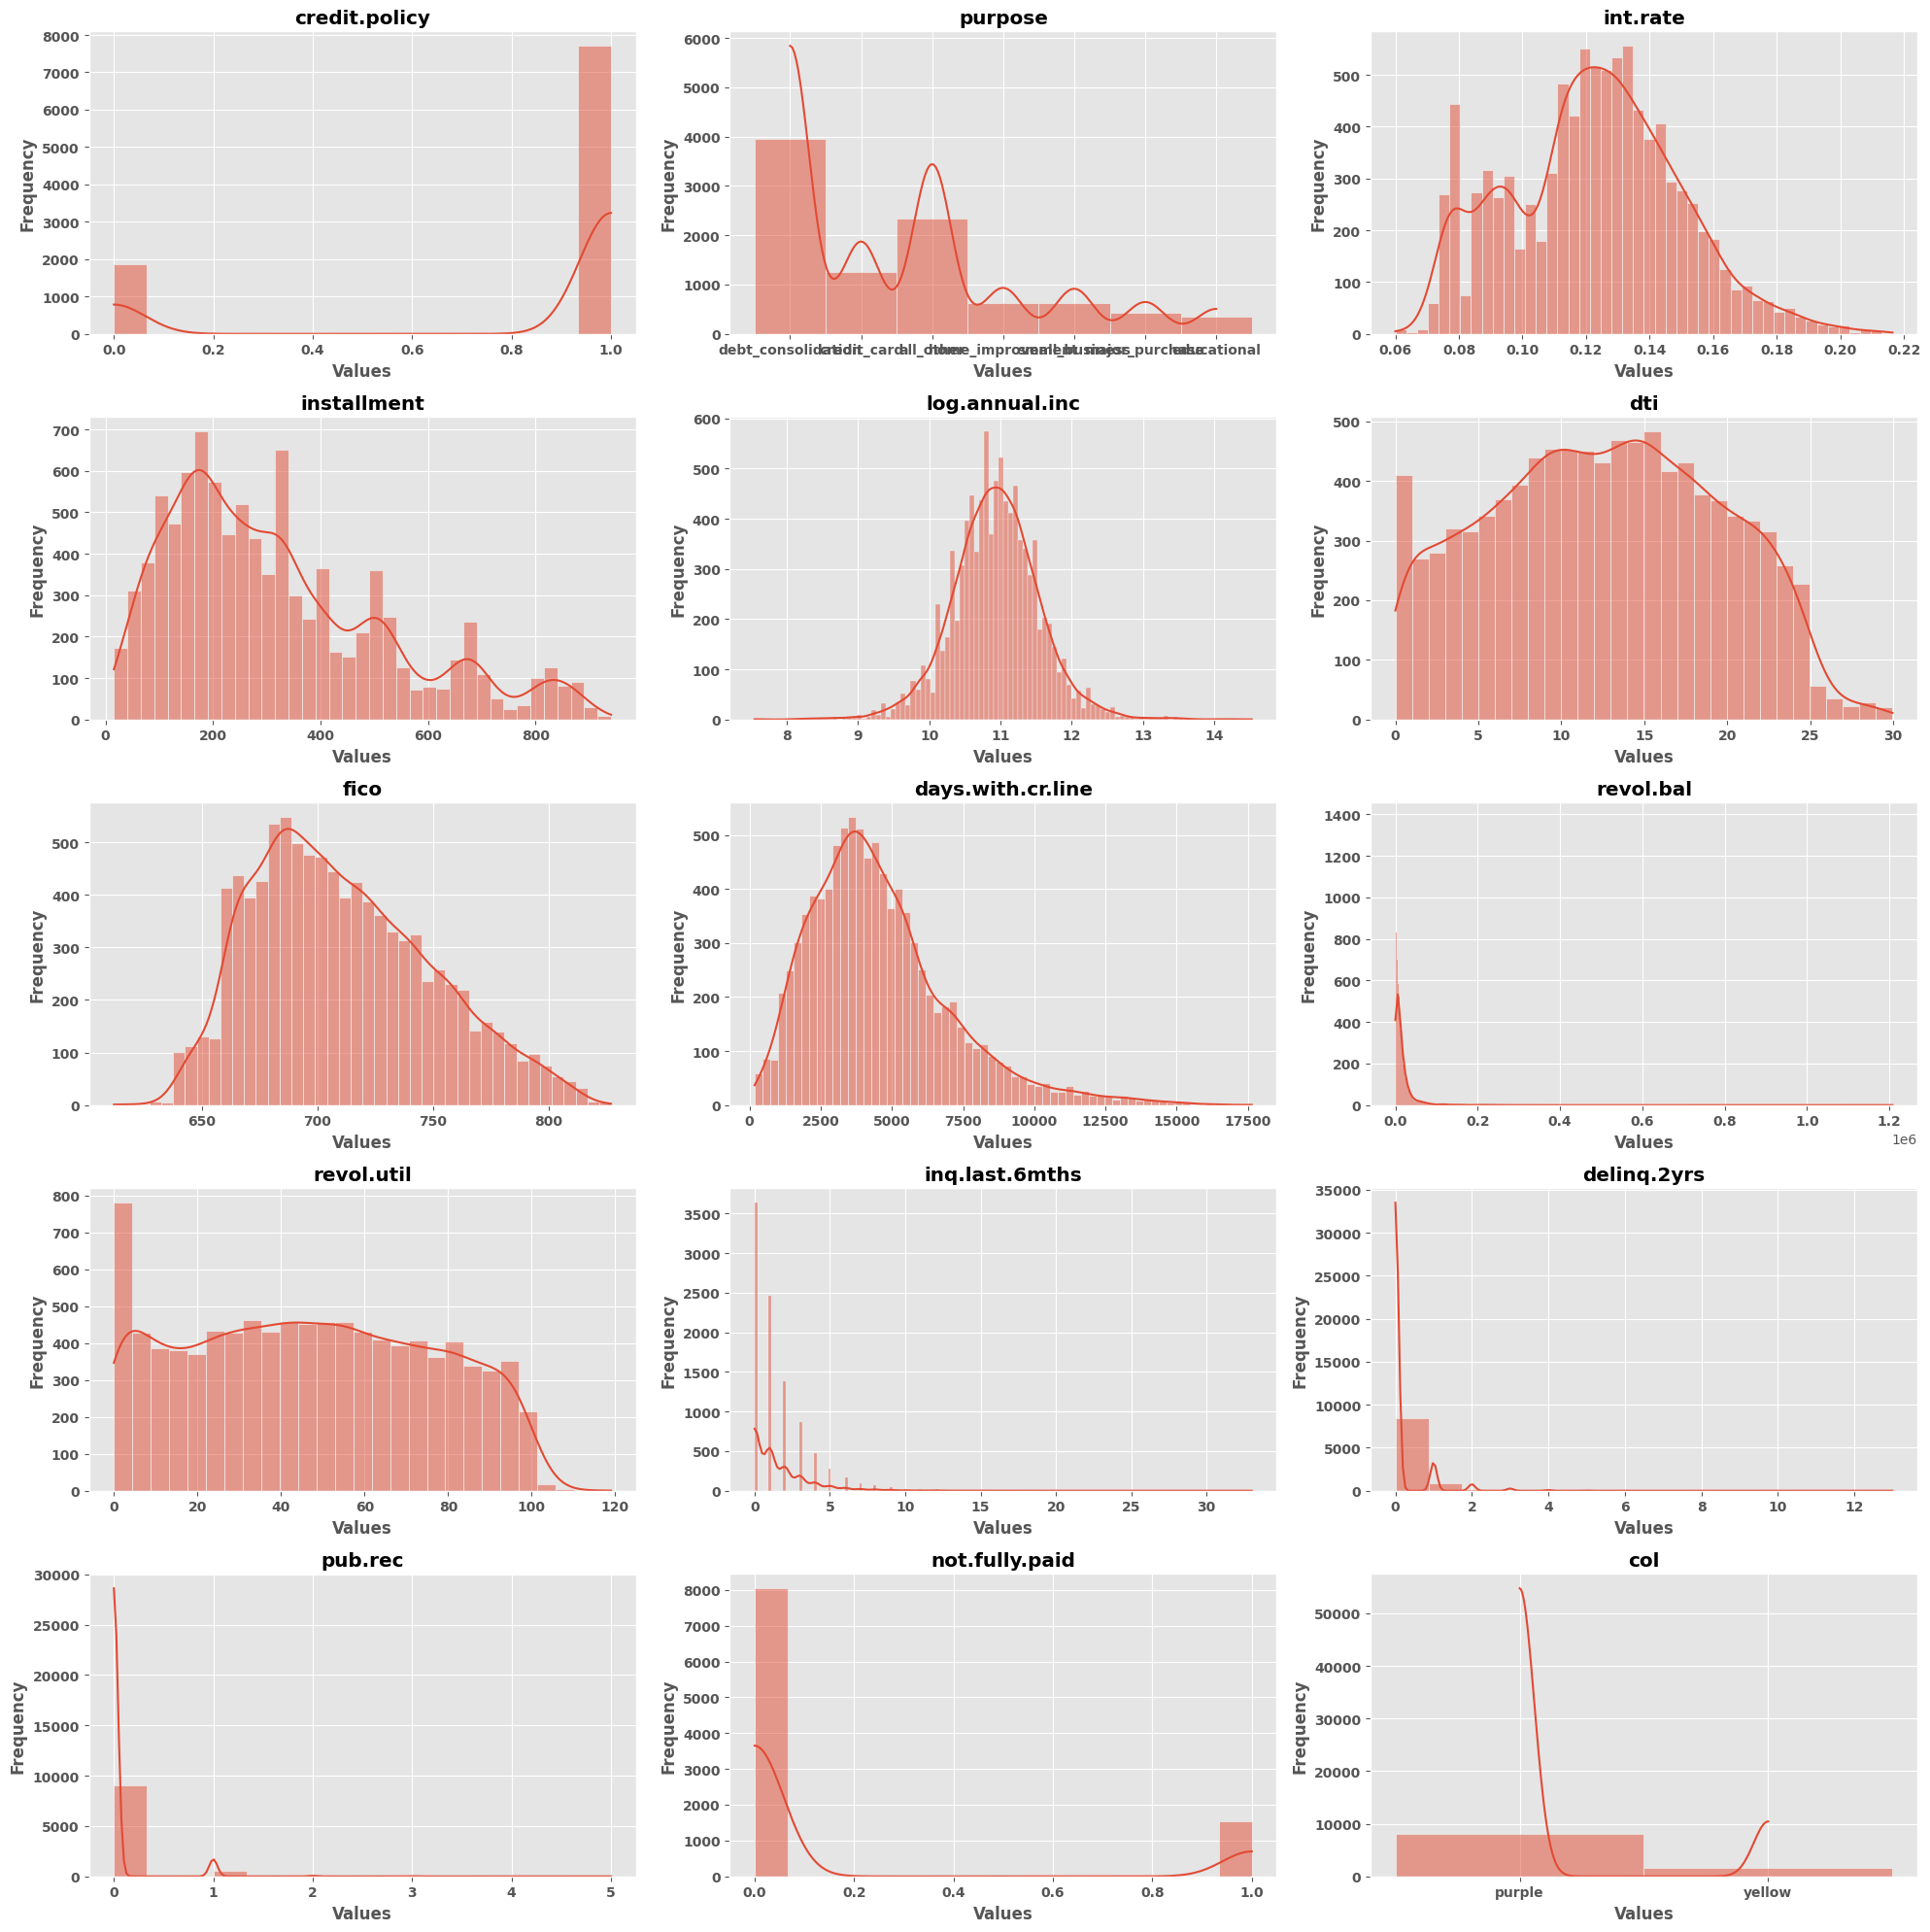

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting distributions of various features
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(20, 20))

columns = df.columns
index = 0

for i in range(5):
    for j in range(3):
        if index < len(columns):
            sns.histplot(df[columns[index]], kde=True, ax=axes[i, j])
            axes[i, j].set_title(columns[index], fontweight='bold')
            axes[i, j].set_xlabel('Values', fontweight='bold')
            axes[i, j].set_ylabel('Frequency', fontweight='bold')
            for label in axes[i, j].get_xticklabels() + axes[i, j].get_yticklabels():
                label.set_fontweight('bold')
            index += 1
        else:
            # If there are more subplots than features, hide the empty subplot
            axes[i, j].axis('off')

plt.tight_layout()
plt.show()


<ipython-input-37-44586f10f776>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap="viridis")  # Set cmap to "Blues" for bluish color


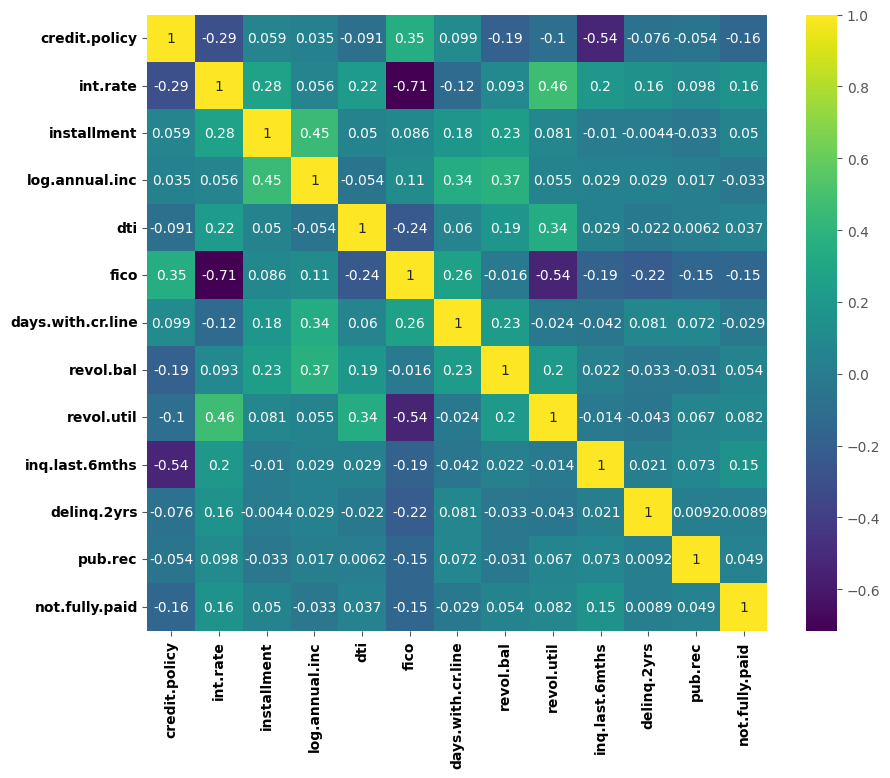

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="viridis")  # Set cmap to "Blues" for bluish color

# Accessing the current axes
ax = plt.gca()

# Bold axis labels with black color
ax.set_xticklabels(ax.get_xticklabels(), fontweight='bold', color='black')
ax.set_yticklabels(ax.get_yticklabels(), fontweight='bold', color='black')

plt.show()


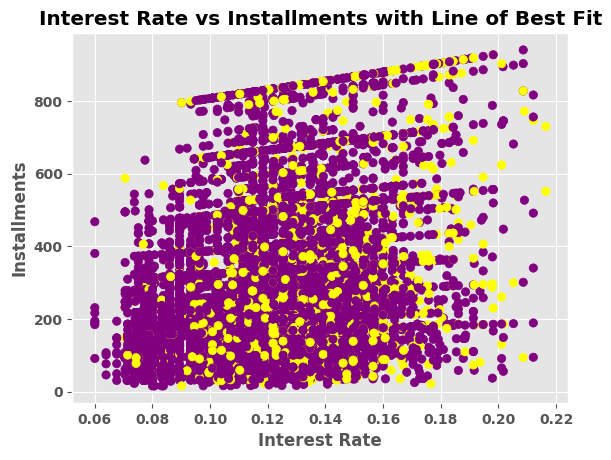

In [ ]:
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import numpy as np

# Scatter plot with color-coded points based on the 'credit.policy' column
scatter = plt.scatter(df['int.rate'], df['installment'], c=df['col'])

# Calculate the coefficients for the line of best fit (linear regression)
#coefficients = np.polyfit(df['int.rate'], df['installment'], 1)
#line = np.poly1d(coefficients)

# Plot the line of best fit
#plt.plot(df['int.rate'], line(df['int.rate']), color='red', linestyle='--')

# Add colorbar
#plt.colorbar(scatter, label='Credit Policy')

# Set labels and title
plt.xlabel('Interest Rate', fontweight='bold')
plt.ylabel('Installments', fontweight='bold')
plt.title('Interest Rate vs Installments with Line of Best Fit', fontweight='bold')

# Set fontweight for ticks
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

# Show plot
plt.show()


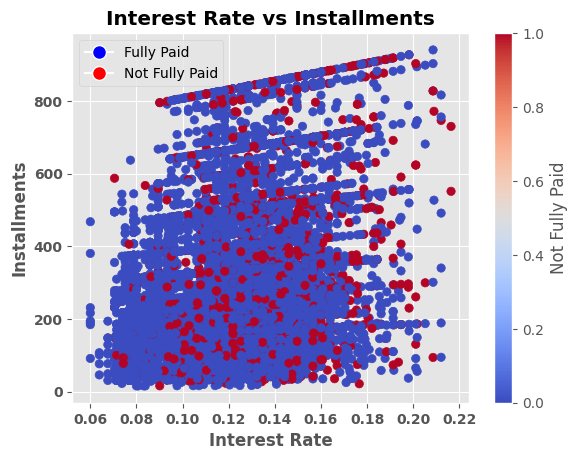

In [ ]:
import matplotlib.pyplot as plt

# Define unique colors for the legend
colors = ['blue', 'red']

# Create scatter plot with color-coded points based on the 'not.fully.paid' column
scatter = plt.scatter(df['int.rate'], df['installment'], c=df['not.fully.paid'], cmap='coolwarm')

# Create custom legend with unique colors
legend_labels = ['Fully Paid', 'Not Fully Paid']
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=label) for color, label in zip(colors, legend_labels)]
plt.legend(handles=legend_handles, loc='best')

# Add colorbar
plt.colorbar(scatter, label='Not Fully Paid')

# Set labels and title
plt.xlabel('Interest Rate', fontweight='bold')
plt.ylabel('Installments', fontweight='bold')
plt.title('Interest Rate vs Installments', fontweight='bold')

# Set fontweight for ticks
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

# Show plot
plt.show()


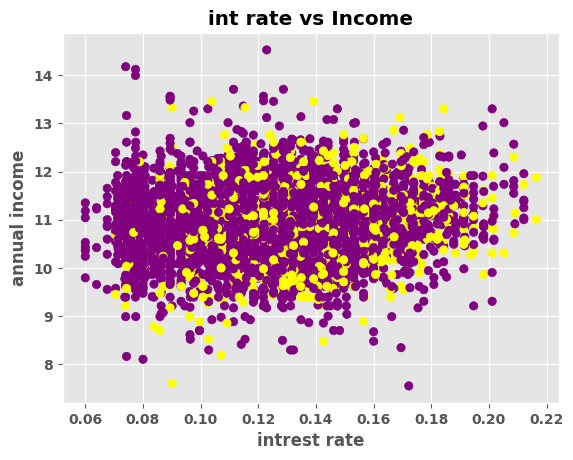

In [ ]:
plt.scatter(df['int.rate'], df['log.annual.inc'], c=df['col'])
plt.colorbar(scatter, label='Not Fully Paid')  # Add a colorbar with label

plt.xlabel('intrest rate',fontweight='bold')
plt.ylabel('annual income',fontweight='bold')
plt.title ('int rate vs Income',fontweight='bold')

plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

plt.show()

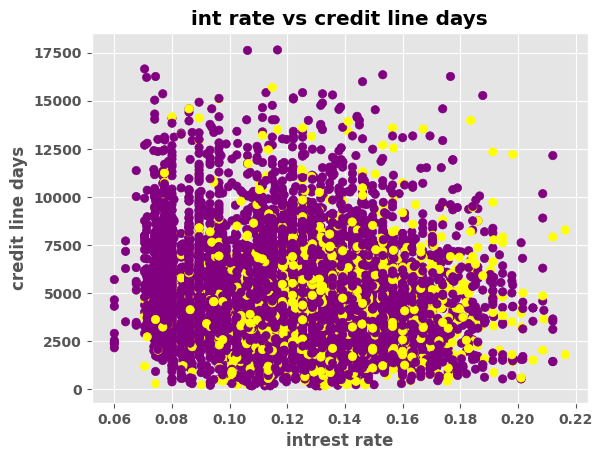

In [ ]:
plt.scatter(df['int.rate'], df['days.with.cr.line'], c=df['col'])
plt.xlabel('intrest rate',fontweight='bold')
plt.ylabel('credit line days',fontweight='bold')
plt.title ('int rate vs credit line days',fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

plt.show()

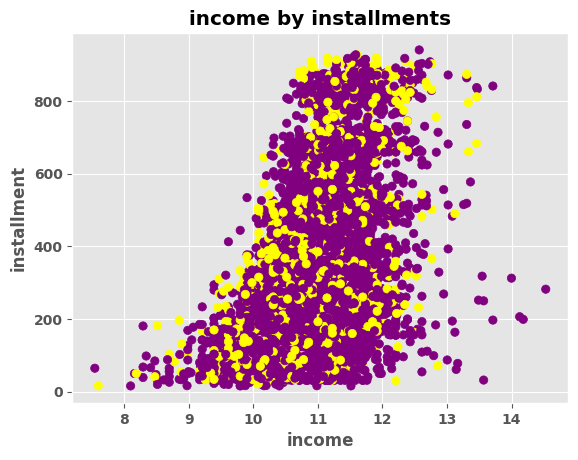

In [ ]:
plt.scatter( df['log.annual.inc'],df['installment'], c=df['col'])
#plt.plot(df['log.annual.inc'],df['installment'])
plt.xlabel('income',fontweight='bold')
plt.ylabel('installment',fontweight='bold')
plt.title ('income by installments',fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

plt.show()

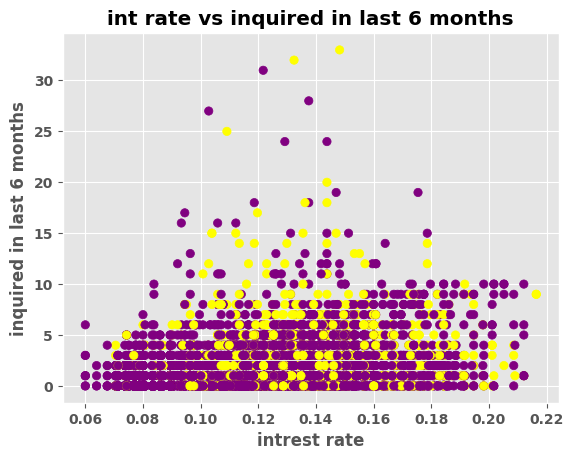

In [ ]:
plt.scatter(df['int.rate'], df['inq.last.6mths'], c=df['col'])
plt.xlabel('intrest rate',fontweight='bold')
plt.ylabel('inquired in last 6 months',fontweight='bold')
plt.title ('int rate vs inquired in last 6 months',fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

plt.show()

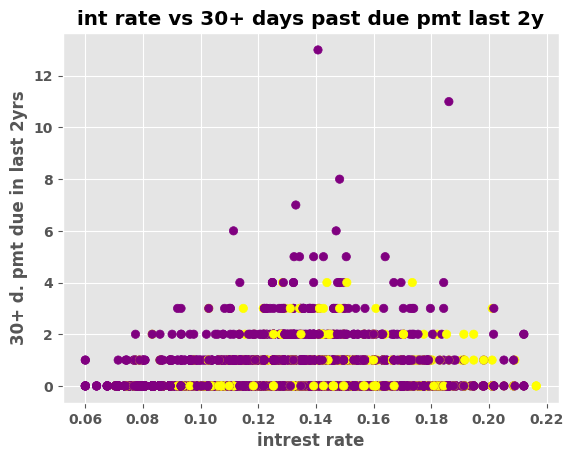

In [ ]:
plt.scatter(df['int.rate'], df['delinq.2yrs'], c=df['col'])
plt.xlabel('intrest rate',fontweight='bold')
plt.ylabel('30+ d. pmt due in last 2yrs',fontweight='bold')
plt.title ('int rate vs 30+ days past due pmt last 2y',fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

plt.show()

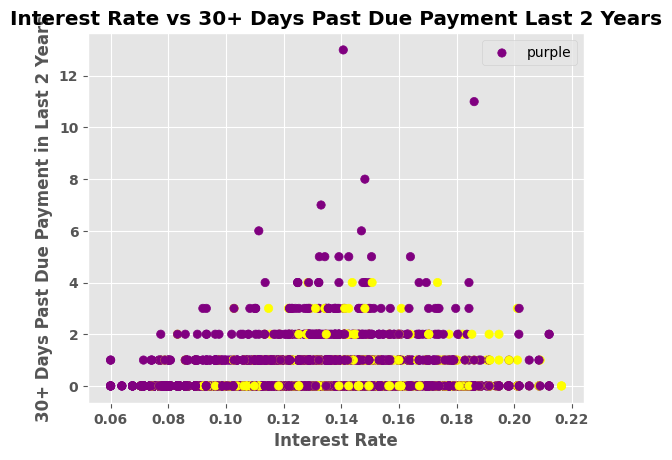

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df['int.rate'], df['delinq.2yrs'], c=df['col'])
plt.xlabel('Interest Rate', fontweight='bold')
plt.ylabel('30+ Days Past Due Payment in Last 2 Years', fontweight='bold')
plt.title('Interest Rate vs 30+ Days Past Due Payment Last 2 Years', fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

# Adding a legend based on the 'col' column
plt.legend(labels=df['col'].unique(), loc='upper right')

plt.show()


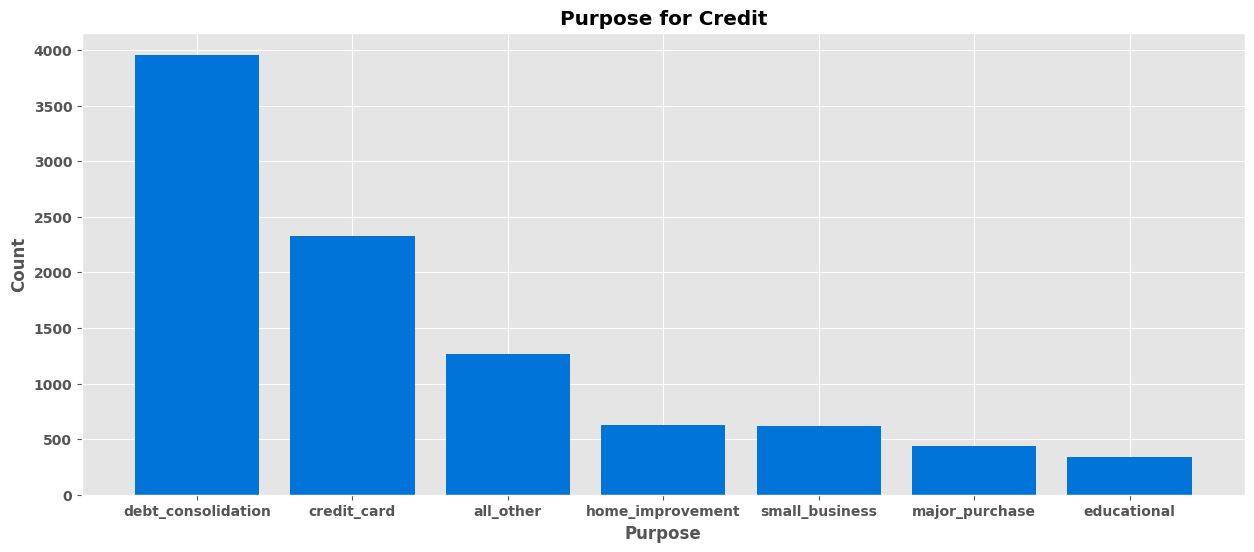

In [ ]:
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

# Define custom colors (mixture of blue and green)
#custom_colors = [(0, 0.5, 1), (0, 1, 0.5)]  # RGB tuples for blue and green mixture

plt.figure(figsize=(15, 6))
plt.bar(df['purpose'].unique(), df['purpose'].value_counts(), color='#0074D9')
plt.xlabel('Purpose', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.title('Purpose for Credit', fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

plt.show()


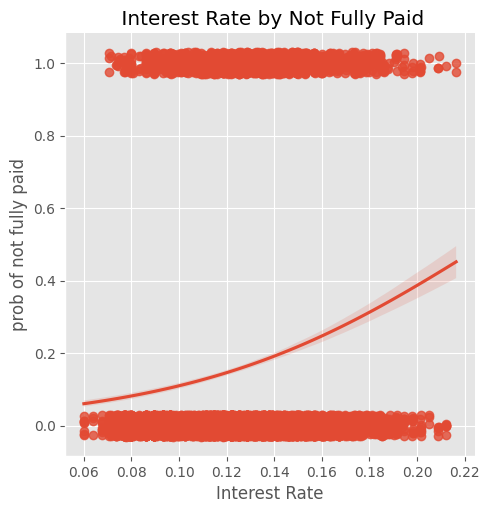

In [ ]:
import seaborn as sns

# Create the logistic regression plot
sns.lmplot(x='int.rate', y='not.fully.paid', data=df, logistic=True, y_jitter=0.03)

# Set labels and title
plt.xlabel('Interest Rate')
plt.ylabel('prob of not fully paid')
plt.title(' Interest Rate by Not Fully Paid')

# Show the plot
plt.show()


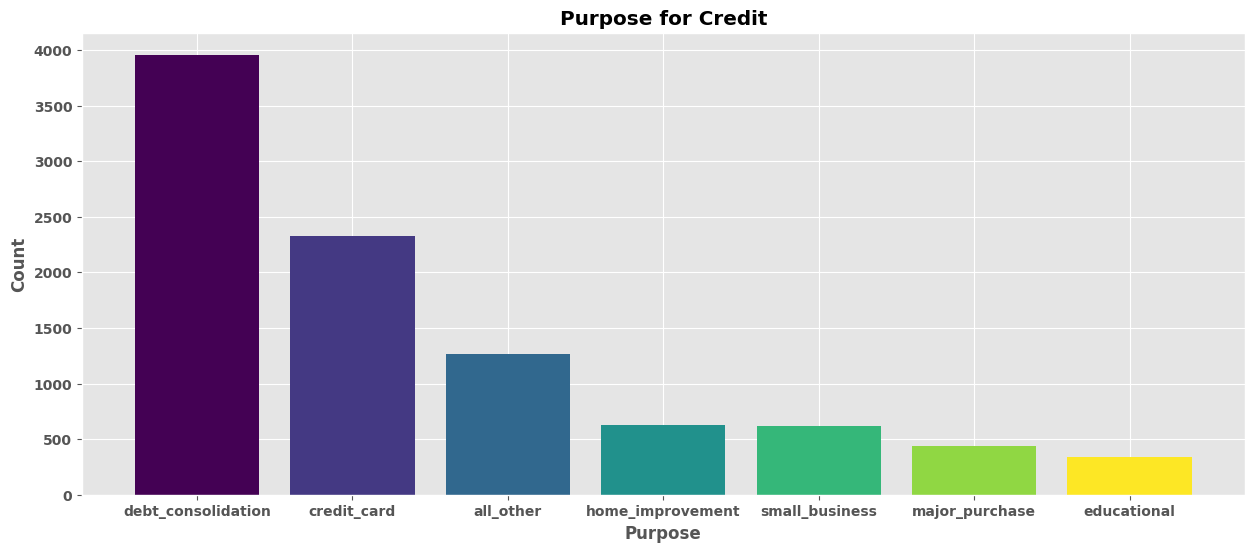

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Generate colors using the viridis colormap
num_categories = len(df['purpose'].unique())
colors = plt.cm.viridis(np.linspace(0, 1, num_categories))

plt.figure(figsize=(15, 6))
plt.bar(df['purpose'].unique(), df['purpose'].value_counts(), color=colors)
plt.xlabel('Purpose', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.title('Purpose for Credit', fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

plt.show()


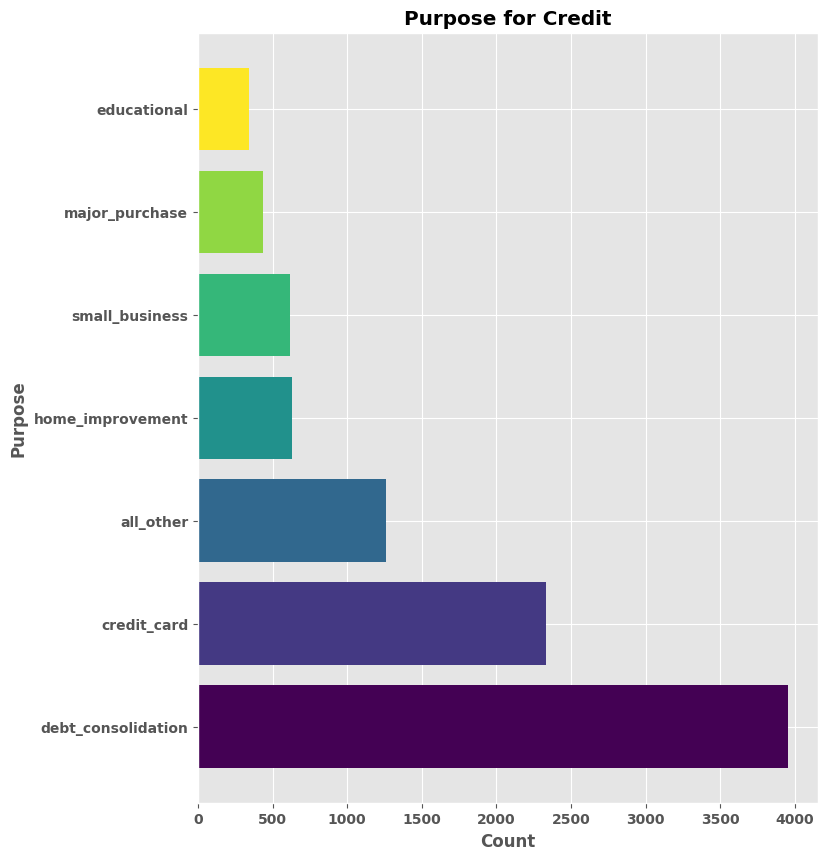

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Generate colors using the viridis colormap
num_categories = len(df['purpose'].unique())
colors = plt.cm.viridis(np.linspace(0, 1, num_categories))

plt.figure(figsize=(8, 10))  # Adjust figure size for vertical display
plt.barh(df['purpose'].unique(), df['purpose'].value_counts(), color=colors)  # Use barh for horizontal bars
plt.ylabel('Purpose', fontweight='bold')  # Change ylabel to 'Purpose'
plt.xlabel('Count', fontweight='bold')  # Change xlabel to 'Count'
plt.title('Purpose for Credit', fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
#xtick = ['educational','major_purchase']
#xlab = ["educational", "major_purcahse"]

#plt.xticks(xtick, xlab)

plt.show()


In [ ]:
df['purpose'].value_counts(normalize=True)

debt_consolidation    0.413134
all_other             0.243370
credit_card           0.131760
home_improvement      0.065671
small_business        0.064627
major_purchase        0.045625
educational           0.035811
Name: purpose, dtype: float64

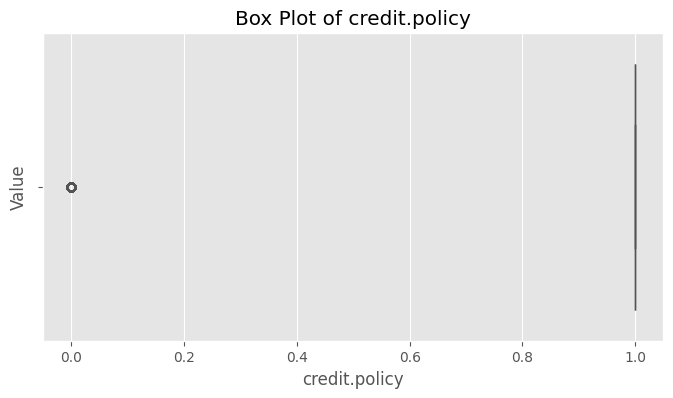

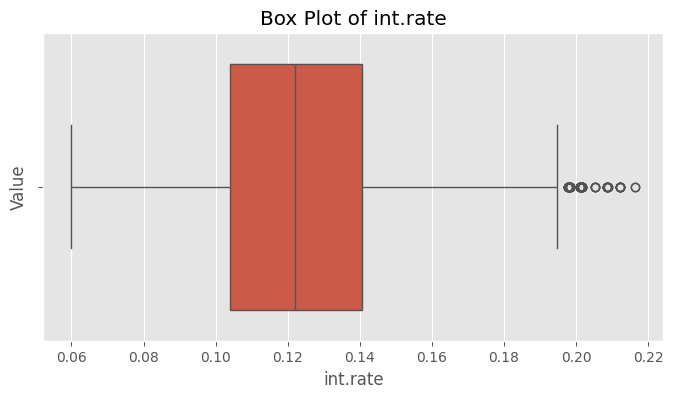

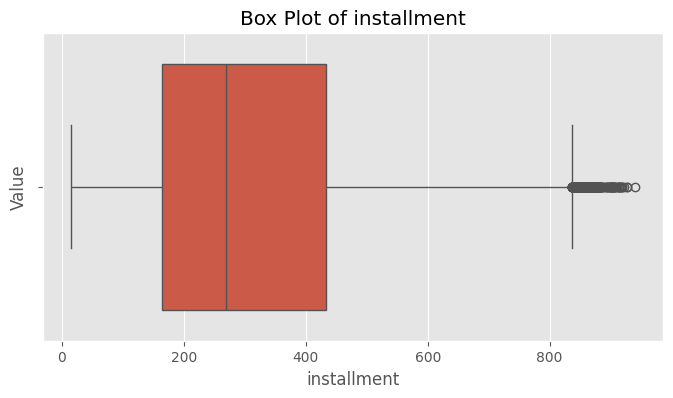

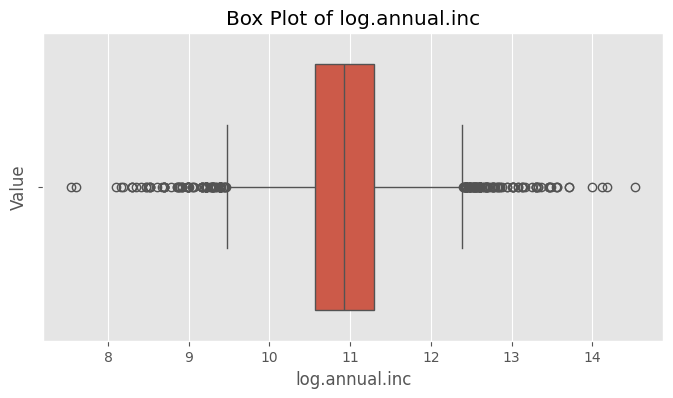

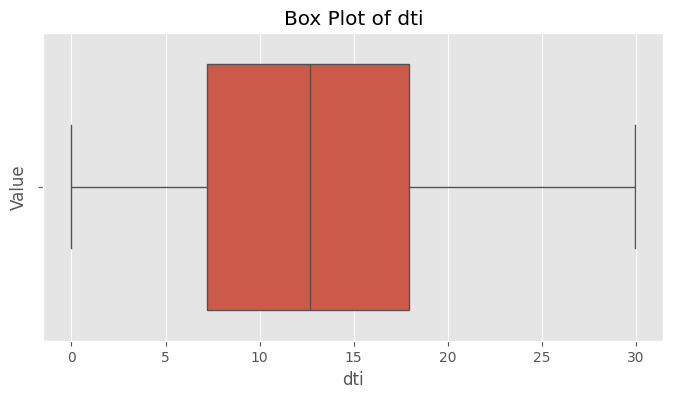

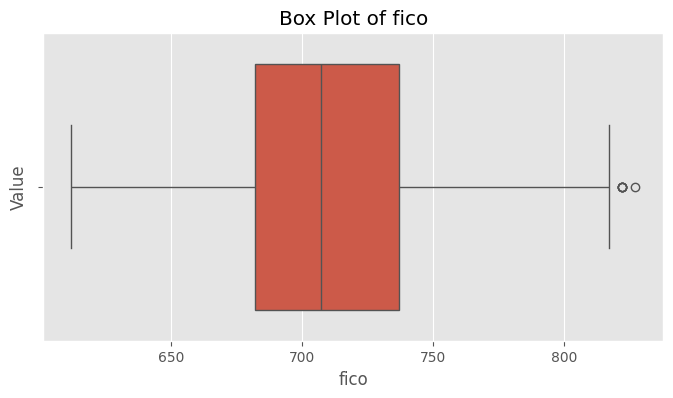

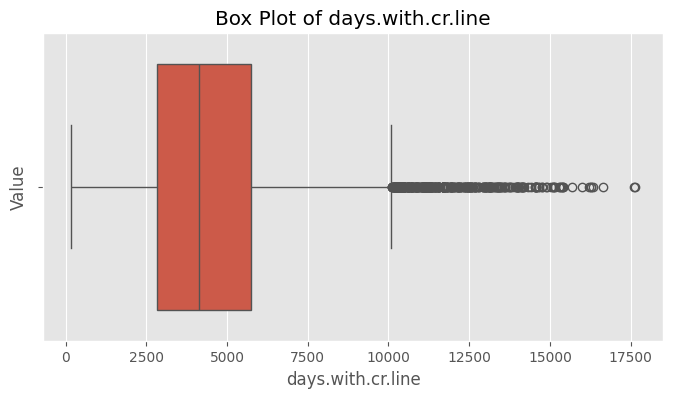

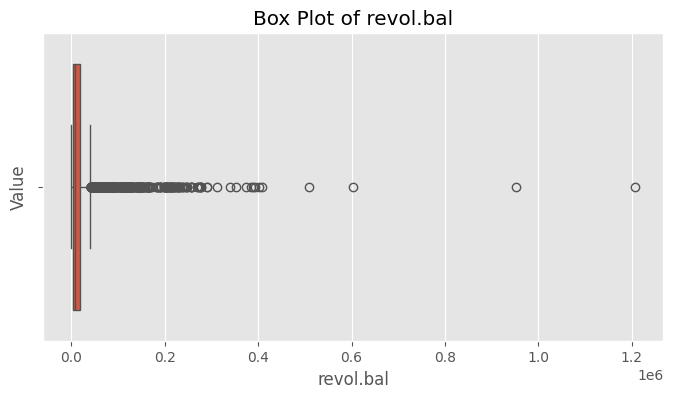

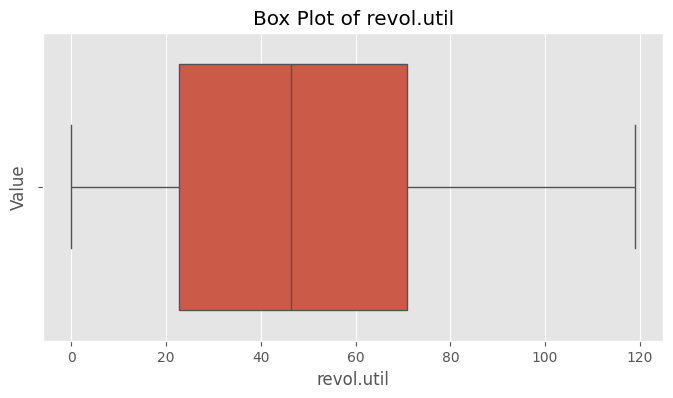

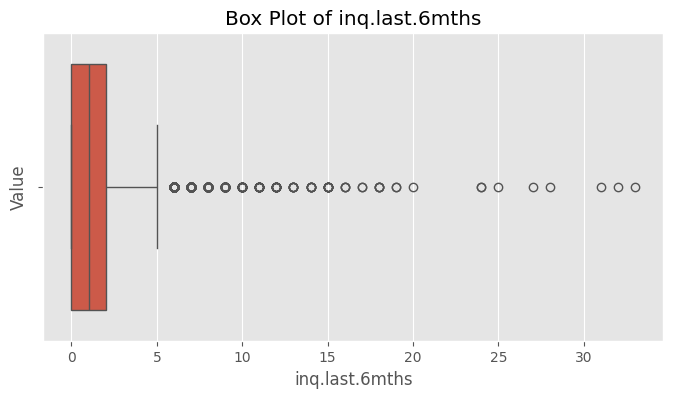

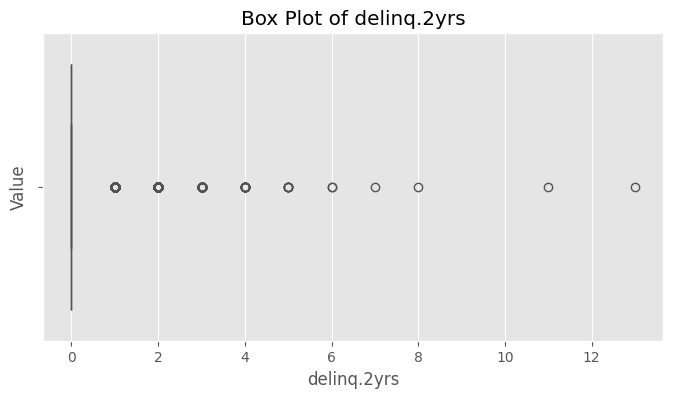

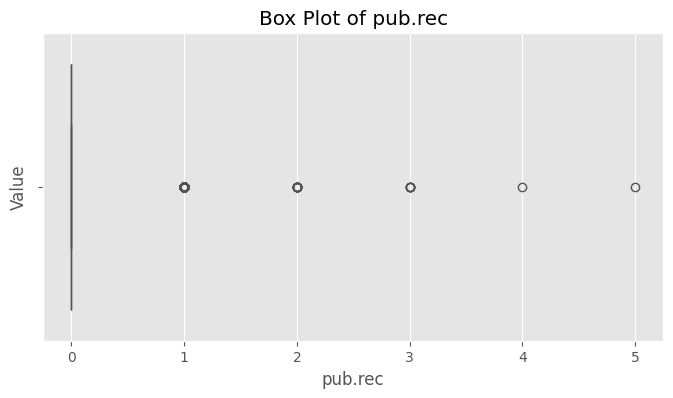

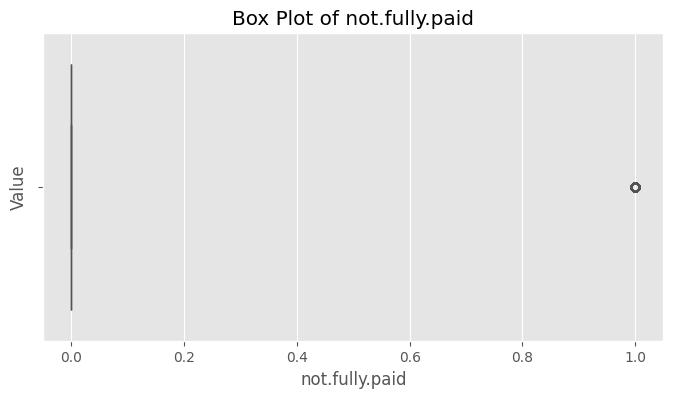

In [ ]:
for column in df.columns:
    # Skip non-numeric data
    if df[column].dtype == 'object':
        continue

    # Create a box plot for the column
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x=column)
    plt.title(f'Box Plot of {column}',fontweight='bold')
    plt.ylabel('Value',fontweight='bold')
    plt.xticks(fontweight='bold')
    plt.yticks(fontweight='bold')

    plt.show()


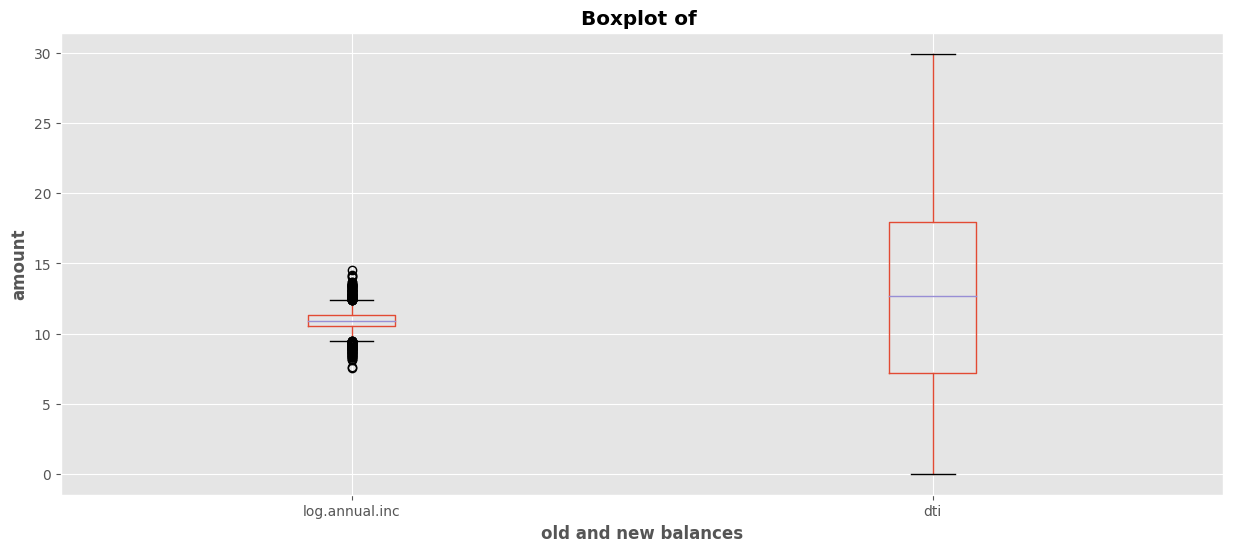

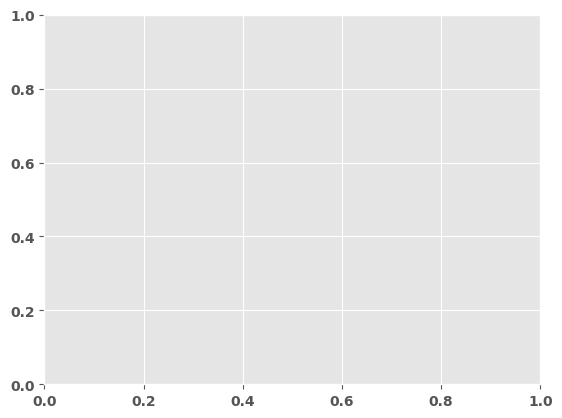

In [ ]:
plt.figure(figsize=(15, 6))
df.boxplot(column=['log.annual.inc', 'dti'])
plt.title('Boxplot of ',fontweight='bold')
plt.xlabel('old and new balances',fontweight='bold')
plt.ylabel('amount',fontweight='bold')
plt.show()
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

plt.subplots_adjust(wspace=1.5)


<ipython-input-42-0770c9762c81>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=df, x='installment', y='purpose', palette='Dark2')
<ipython-input-42-0770c9762c81>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), fontweight='bold')
<ipython-input-42-0770c9762c81>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontweight='bold')


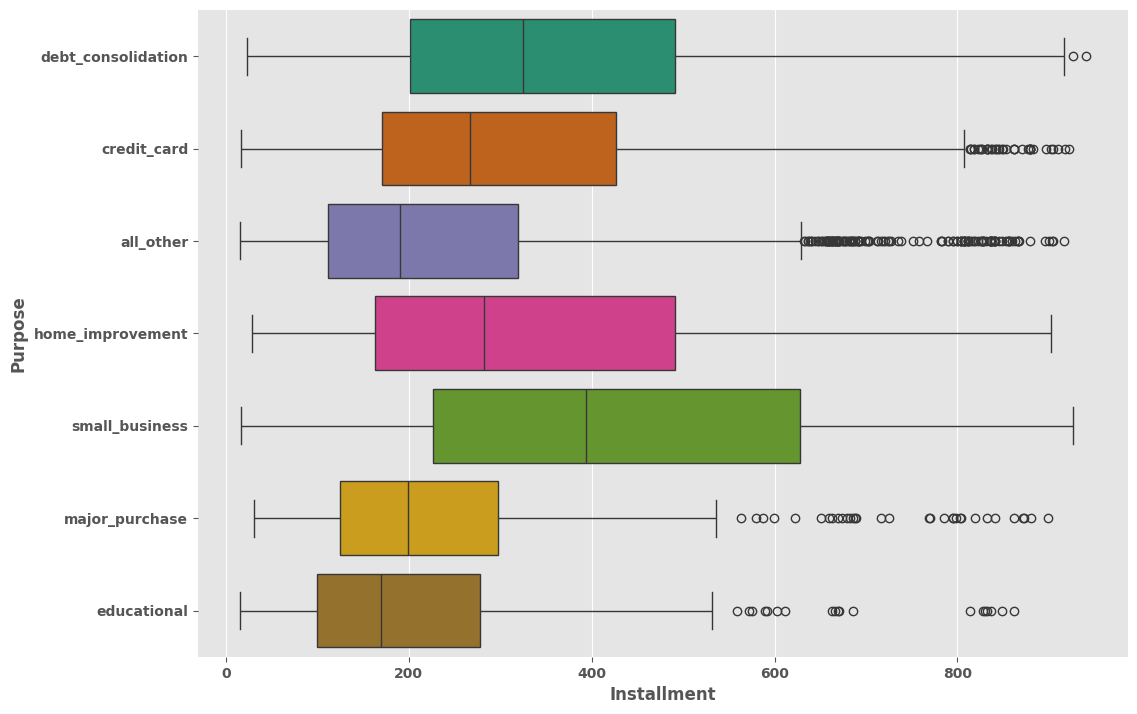

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

figsize = (12, 1.2 * len(df['purpose'].unique()))
plt.figure(figsize=figsize)
ax = sns.boxplot(data=df, x='installment', y='purpose', palette='Dark2')

# Bold axis labels
ax.set_xlabel('Installment', fontweight='bold')
ax.set_ylabel('Purpose', fontweight='bold')

# Bold axis ticks
ax.set_xticklabels(ax.get_xticklabels(), fontweight='bold')
ax.set_yticklabels(ax.get_yticklabels(), fontweight='bold')

sns.despine(top=True, right=True, bottom=True, left=True)
plt.show()


In [ ]:
df

credit.policy             purpose  int.rate  installment  \
0                 1  debt_consolidation    0.1189       829.10   
1                 1         credit_card    0.1071       228.22   
2                 1  debt_consolidation    0.1357       366.86   
3                 1  debt_consolidation    0.1008       162.34   
4                 1         credit_card    0.1426       102.92   
...             ...                 ...       ...          ...   
9573              0           all_other    0.1461       344.76   
9574              0           all_other    0.1253       257.70   
9575              0  debt_consolidation    0.1071        97.81   
9576              0    home_improvement    0.1600       351.58   
9577              0  debt_consolidation    0.1392       853.43   

      log.annual.inc    dti  fico  days.with.cr.line  revol.bal  revol.util  \
0          11.350407  19.48   737        5639.958333      28854        52.1   
1          11.082143  14.29   707        2760.000000      33623        76.7   
2          10.373491  11.63   682        4710.000000       3511        25.6   
3          11.350407   8.10   712        2699.958333      33667        73.2   
4          11.299732  14.97   667        4066.000000       4740        39.5   
...              ...    ...   ...                ...        ...         ...   
9573       12.180755  10.39   672       10474.000000     215372        82.1   
9574       11.141862   0.21   722        4380.000000        184         1.1   
9575       10.596635  13.09   687        3450.041667      10036        82.9   
9576       10.819778  19.18   692        1800.000000          0         3.2   
9577       11.264464  16.28   732        4740.000000      37879        57.0   

      inq.last.6mths  delinq.2yrs  pub.rec  not.fully.paid     col  
0                  0            0        0               0  purple  
1                  0            0        0               0  purple  
2                  1            0        0               0  purple  
3                  1            0        0               0  purple  
4                  0            1        0               0  purple  
...              ...          ...      ...             ...     ...  
9573               2            0        0               1  yellow  
9574               5            0        0               1  yellow  
9575               8            0        0               1  yellow  
9576               5            0        0               1  yellow  
9577               6            0        0               1  yellow  

[9578 rows x 15 columns]

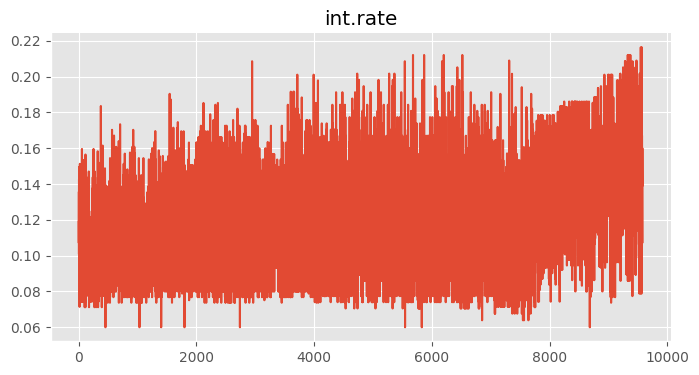

In [ ]:
# @title int.rate

from matplotlib import pyplot as plt
df['int.rate'].plot(kind='line', figsize=(8, 4), title='int.rate')
plt.gca().spines[['top', 'right']].set_visible(False)

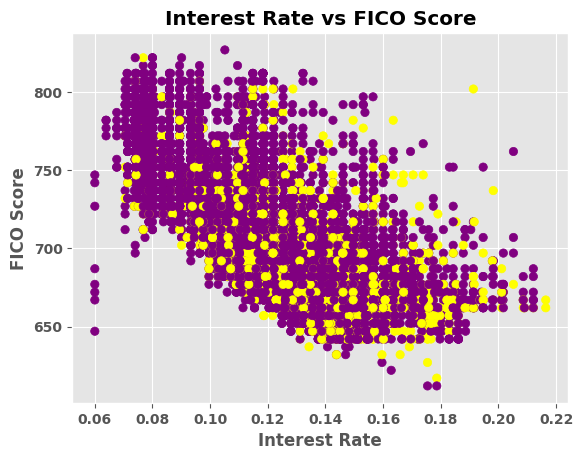

In [ ]:
# @title Interest rate vs FICO score

import matplotlib.pyplot as plt

# Scatter plot
plt.scatter(df['int.rate'], df['fico'], c=df['col'])

# Bold labels
plt.xlabel('Interest Rate', fontweight='bold')
plt.ylabel('FICO Score', fontweight='bold')
plt.title('Interest Rate vs FICO Score', fontweight='bold')

# Bold axis ticks
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

plt.show()


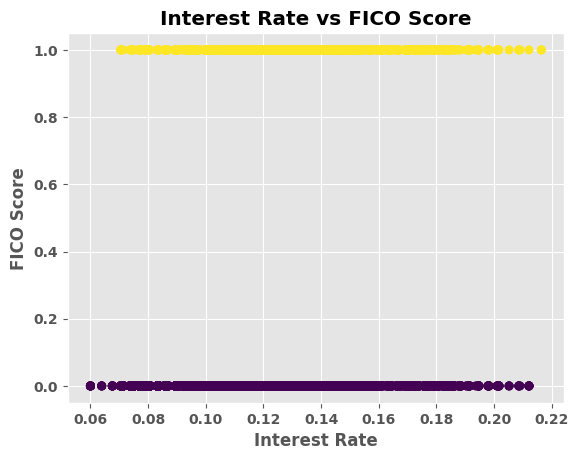

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot
plt.scatter(df['int.rate'], df['not.fully.paid'], c=df['not.fully.paid'])

# Bold labels
plt.xlabel('Interest Rate', fontweight='bold')
plt.ylabel('FICO Score', fontweight='bold')
plt.title('Interest Rate vs FICO Score', fontweight='bold')

# Bold axis ticks
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

plt.show()


(array([600., 650., 700., 750., 800., 850.]),
 [Text(0, 600.0, '600'),
  Text(0, 650.0, '650'),
  Text(0, 700.0, '700'),
  Text(0, 750.0, '750'),
  Text(0, 800.0, '800'),
  Text(0, 850.0, '850')])

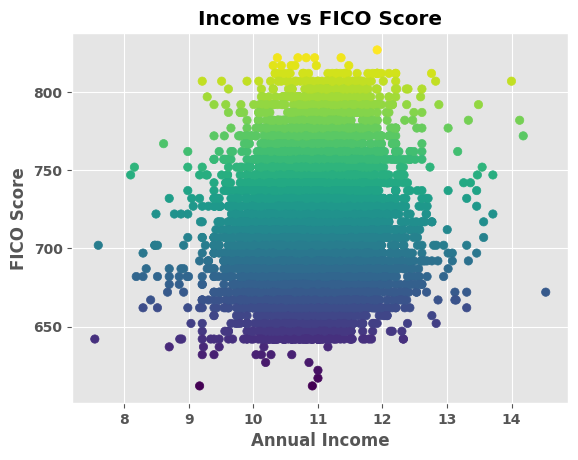

In [ ]:
plt.scatter(df['log.annual.inc'], df['fico'], c=df['fico'])
plt.xlabel('Annual Income',fontweight='bold')
plt.ylabel('FICO Score', fontweight='bold')
_ = plt.title('Income vs FICO Score',fontweight='bold')
# Bold axis ticks
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')


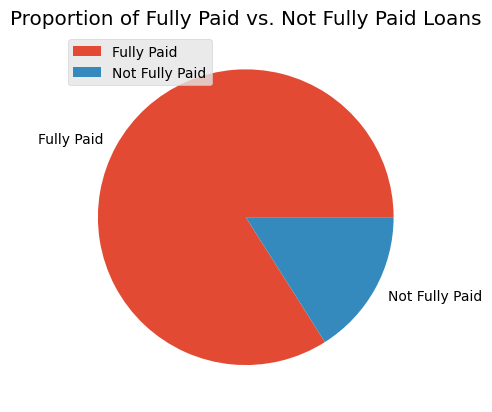

In [ ]:
import matplotlib.pyplot as plt

# Calculate the value counts normalized
value_counts_normalized = df['not.fully.paid'].value_counts(normalize=True)

# Define labels for the pie chart
labels = ['Fully Paid', 'Not Fully Paid']

# Plotting the pie chart
plt.pie(value_counts_normalized, labels=labels)

# Adding a legend
plt.legend()

# Adding a title
plt.title('Proportion of Fully Paid vs. Not Fully Paid Loans')

# Displaying the plot
plt.show()


In [ ]:
df['not.fully.paid'].value_counts(normalize=True)

0    0.839946
1    0.160054
Name: not.fully.paid, dtype: float64

In [ ]:
a = df.drop(columns=['purpose', 'col'], axis=1)
a

credit.policy  int.rate  installment  log.annual.inc    dti  fico  \
0                 1    0.1189       829.10       11.350407  19.48   737   
1                 1    0.1071       228.22       11.082143  14.29   707   
2                 1    0.1357       366.86       10.373491  11.63   682   
3                 1    0.1008       162.34       11.350407   8.10   712   
4                 1    0.1426       102.92       11.299732  14.97   667   
...             ...       ...          ...             ...    ...   ...   
9573              0    0.1461       344.76       12.180755  10.39   672   
9574              0    0.1253       257.70       11.141862   0.21   722   
9575              0    0.1071        97.81       10.596635  13.09   687   
9576              0    0.1600       351.58       10.819778  19.18   692   
9577              0    0.1392       853.43       11.264464  16.28   732   

      days.with.cr.line  revol.bal  revol.util  inq.last.6mths  delinq.2yrs  \
0           5639.958333      28854        52.1               0            0   
1           2760.000000      33623        76.7               0            0   
2           4710.000000       3511        25.6               1            0   
3           2699.958333      33667        73.2               1            0   
4           4066.000000       4740        39.5               0            1   
...                 ...        ...         ...             ...          ...   
9573       10474.000000     215372        82.1               2            0   
9574        4380.000000        184         1.1               5            0   
9575        3450.041667      10036        82.9               8            0   
9576        1800.000000          0         3.2               5            0   
9577        4740.000000      37879        57.0               6            0   

      pub.rec  not.fully.paid  
0           0               0  
1           0               0  
2           0               0  
3           0               0  
4           0               0  
...       ...             ...  
9573        0               1  
9574        0               1  
9575        0               1  
9576        0               1  
9577        0               1  

[9578 rows x 13 columns]

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# List of columns to scale
columns_to_scale = ['int.rate', 'installment', 'log.annual.inc', 'dti', 'fico','days.with.cr.line','revol.bal','revol.util']

# Applying StandardScaler only to the specified columns
df_scaled = a.copy()
df_scaled[columns_to_scale] = scaler.fit_transform(a[columns_to_scale])

# Display the first few rows of the scaled dataframe
df_scaled.head()

credit.policy  int.rate  installment  log.annual.inc       dti      fico  \
0              1 -0.139318     2.463099        0.680388  0.998505  0.688825   
1              1 -0.578868    -0.438854        0.244031  0.244540 -0.101303   
2              1  0.486484     0.230708       -0.908659 -0.141885 -0.759742   
3              1 -0.813544    -0.757022        0.680388 -0.654697  0.030385   
4              1  0.743509    -1.043992        0.597961  0.343326 -1.154806   

   days.with.cr.line  revol.bal  revol.util  inq.last.6mths  delinq.2yrs  \
0           0.432230   0.353732    0.182704               0            0   
1          -0.721230   0.495018    1.030602               0            0   
2           0.059770  -0.397073   -0.730683               1            0   
3          -0.745277   0.496321    0.909966               1            0   
4          -0.198161  -0.360663   -0.251586               0            1   

   pub.rec  not.fully.paid  
0        0               0  
1        0               0  
2        0               0  
3        0               0  
4        0               0

**Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split
X=a.drop('not.fully.paid', axis=1)
y1=df['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split( X, y1, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)
print(type(X_train)); print(type(y_train))

Train set: (7662, 12) (7662,)
Test set: (1916, 12) (1916,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [ ]:
from sklearn.model_selection import train_test_split
Xs=df_scaled.drop('not.fully.paid', axis=1)
ys=df_scaled['not.fully.paid']
Xs_train, Xs_test, ys_train, ys_test = train_test_split( Xs, ys, test_size=0.2, random_state=4)
print ('Train set:', Xs_train.shape,  ys_train.shape)
print ('Test set:', Xs_test.shape,  ys_test.shape)
print(type(Xs_train)); print(type(ys_train))

Train set: (7662, 12) (7662,)
Test set: (1916, 12) (1916,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

LR1 = LogisticRegression(penalty=None).fit(X_train,y_train)
print(LR1)
LR2 = LogisticRegression(penalty=None).fit(Xs_train,ys_train)
LR2

LogisticRegression(penalty=None)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(penalty=None)

In [ ]:
yhat1 = LR1.predict(X_test)
print(yhat1)
yhat2 = LR2.predict(Xs_test)
yhat2


[0 1 1 ... 1 1 0]


array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
yhat1_prob_temp = LR1.predict_proba(X_test)
yhat1_prob_temp
yhat2_prob_temp = LR2.predict_proba(Xs_test)
yhat2_prob_temp


array([[0.8686396 , 0.1313604 ],
       [0.66691622, 0.33308378],
       [0.75766362, 0.24233638],
       ...,
       [0.78790523, 0.21209477],
       [0.81513524, 0.18486476],
       [0.91845588, 0.08154412]])

In [ ]:
yhat1_prob = LR1.predict_proba(X_test)[:,1]
yhat1_prob
yhat2_prob = LR2.predict_proba(Xs_test)[:,1]
yhat2_prob

array([0.1313604 , 0.33308378, 0.24233638, ..., 0.21209477, 0.18486476,
       0.08154412])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, yhat1)

0.5908141962421712

In [ ]:
import statsmodels.api as sm
logit_model=sm.Logit(y1,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.415984
         Iterations 6
                         Results: Logit
Model:              Logit            Method:           MLE       
Dependent Variable: not.fully.paid   Pseudo R-squared: 0.054     
Date:               2024-03-26 23:25 AIC:              7992.5853 
No. Observations:   9578             BIC:              8078.5920 
Df Model:           11               Log-Likelihood:   -3984.3   
Df Residuals:       9566             LL-Null:          -4212.0   
Converged:          1.0000           LLR p-value:      9.9376e-91
No. Iterations:     6.0000           Scale:            1.0000    
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
credit.policy     -0.3832   0.0832 -4.6070 0.0000 -0.5462 -0.2202
int.rate          10.6785   1.3160  8.1141 0.0000  8.0991 13.2579


In [ ]:
X = sm.add_constant(X)

# Fit logistic regression model
model = sm.Logit(y1, X).fit()

# Print model summary
coefficients = model.params

# Calculate odds ratios
odds_ratios = np.exp(coefficients)

# Print odds ratios
for feature, odds_ratio in zip(X.columns, odds_ratios):
    print(f'{feature}: {odds_ratio}')

Optimization terminated successfully.
         Current function value: 0.414583
         Iterations 6
const: 647.6836877680149
credit.policy: 0.7216980757480531
int.rate: 224.13187583853204
installment: 1.00105237668777
log.annual.inc: 0.666952687894646
dti: 0.9930450667860351
fico: 0.9933158854848539
days.with.cr.line: 1.000012241388024
revol.bal: 1.000003595000097
revol.util: 1.0007364436607622
inq.last.6mths: 1.0957790042504225
delinq.2yrs: 0.9140527755390281
pub.rec: 1.2590125231361236


In [ ]:
model = sm.Logit(y1, X).fit()

# Print model summary
summary = model.summary()
results_table = summary.tables[1]
coef_data = results_table.data[1:]

# Create a dictionary to store coefficient estimates, standard errors, and confidence intervals
coef_info = {}
for row in coef_data:
    coef_name = row[0]
    coef_value = float(row[1])
    std_error = float(row[2])
    ci_lower = float(row[4])
    ci_upper = float(row[5])

    # Calculate odds ratio
    odds_ratio = np.exp(coef_value)

    # Calculate confidence intervals for odds ratio
    ci_lower_odds_ratio = np.exp(ci_lower)
    ci_upper_odds_ratio = np.exp(ci_upper)

    coef_info[coef_name] = {
        'Coefficient': coef_value,
        'Standard Error': std_error,
        'Odds Ratio': odds_ratio,
        'CI Lower': ci_lower_odds_ratio,
        'CI Upper': ci_upper_odds_ratio
    }

# Print coefficient information
for coef_name, info in coef_info.items():
    print(f'{coef_name}:')
    print(f'  Coefficient: {info["Coefficient"]}')
    print(f'  Standard Error: {info["Standard Error"]}')
    print(f'  Odds Ratio: {info["Odds Ratio"]}')
    print(f'  95% CI Lower: {info["CI Lower"]}')
    print(f'  95% CI Upper: {info["CI Upper"]}')
    print()

Optimization terminated successfully.
         Current function value: 0.414583
         Iterations 6
const:
  Coefficient: 6.4734
  Standard Error: 1.258
  Odds Ratio: 647.68210676463
  95% CI Lower: 1.0
  95% CI Upper: 55.091751257146804

credit.policy:
  Coefficient: -0.3261
  Standard Error: 0.084
  Odds Ratio: 0.7217330105218783
  95% CI Lower: 1.0
  95% CI Upper: 0.6120140740013499

int.rate:
  Coefficient: 5.4122
  Standard Error: 1.683
  Odds Ratio: 224.12411875897538
  95% CI Lower: 1.0010005001667084
  95% CI Upper: 8.281300323764736

installment:
  Coefficient: 0.0011
  Standard Error: 0.0
  Odds Ratio: 1.0011006052218943
  95% CI Lower: 1.0
  95% CI Upper: 1.0010005001667084

log.annual.inc:
  Coefficient: -0.405
  Standard Error: 0.059
  Odds Ratio: 0.6669768108584744
  95% CI Lower: 1.0
  95% CI Upper: 0.5945205479701944

dti:
  Coefficient: -0.007
  Standard Error: 0.004
  Odds Ratio: 0.9930244429332351
  95% CI Lower: 1.1274968515793757
  95% CI Upper: 0.984127320055285

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
classificatio_report

NameError: name 'classificatio_report' is not defined

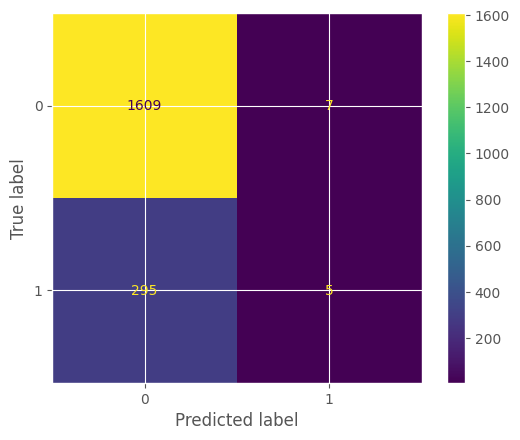

In [ ]:
cm = confusion_matrix(y_test, yhat1)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

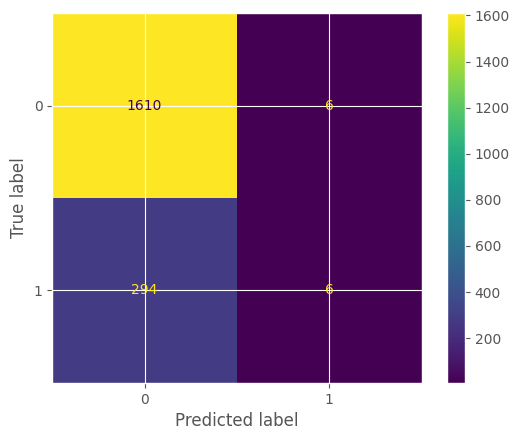

In [ ]:
cms = confusion_matrix(ys_test, yhat2)

disp = ConfusionMatrixDisplay(confusion_matrix=cms)
disp.plot()

In [ ]:
print(type(yhat1_prob))

<class 'numpy.ndarray'>


In [ ]:
print(type(yhat2_prob))

<class 'numpy.ndarray'>


In [ ]:
prob_df = pd.DataFrame(yhat1_prob)

prob_df.describe()

0
count  1916.000000
mean      0.159605
std       0.075320
min       0.044344
25%       0.115067
50%       0.147195
75%       0.184497
max       0.951105

In [ ]:
tn, fp, fn, tp = cm.ravel()

print(tn, fp, fn, tp)

1609 7 295 5


In [ ]:
tn, fp, fn, tp = cms.ravel()

print(tn, fp, fn, tp)

1610 6 294 6


In [ ]:
sensitivity = tp / (tp + fn)

specificity = tn / (tn + fp)
print("Sensitivity: ", sensitivity)
print("Specificity: ", specificity)

Sensitivity:  0.02
Specificity:  0.9962871287128713


In [ ]:
sensitivity = tp / (tp + fn)

specificity = tn / (tn + fp)
print("Sensitivity: ", sensitivity)
print("Specificity: ", specificity)

Sensitivity:  0.02
Specificity:  0.9962871287128713


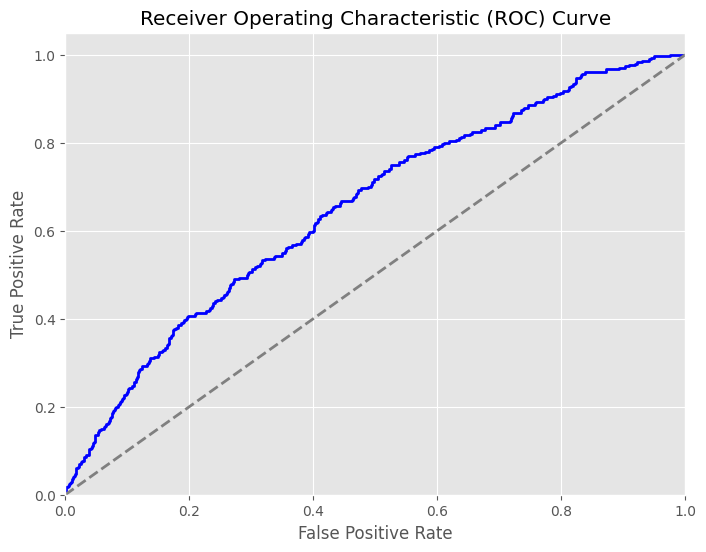

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

# Calculate the ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, yhat1_prob)
roc_auc = roc_auc_score(y_test, yhat1_prob)

# Plotting the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')

plt.show()


In [ ]:
roc_auc

0.6515202145214521

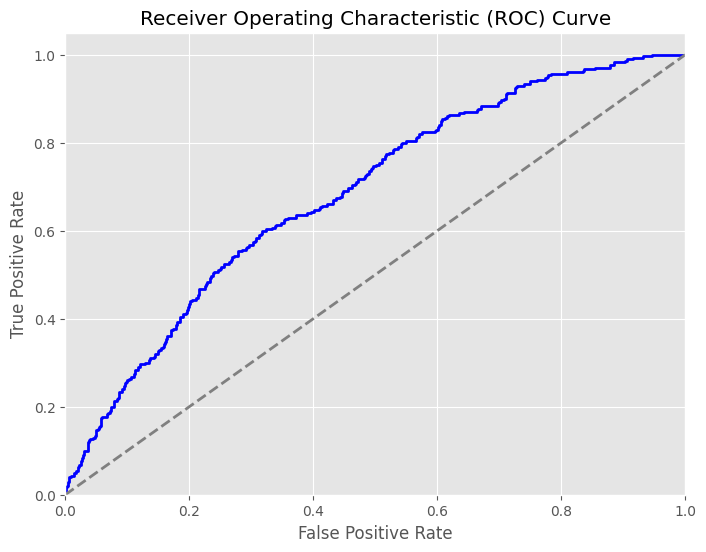

In [ ]:
fpr, tpr, thresholds = roc_curve(ys_test, yhat2_prob)
roc_auc = roc_auc_score(ys_test, yhat2_prob)

# Plotting the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')

plt.show()


In [ ]:
roc_auc

0.6848411716171616

In [ ]:
print(fpr); print(tpr); print(thresholds)

[0.         0.         0.         0.00185644 0.00185644 0.00309406
 0.00309406 0.00433168 0.00433168 0.0049505  0.0049505  0.00556931
 0.00556931 0.00680693 0.00680693 0.00990099 0.00990099 0.01485149
 0.01485149 0.01670792 0.01670792 0.01980198 0.01980198 0.02042079
 0.02042079 0.0210396  0.0210396  0.02289604 0.02289604 0.02475248
 0.02475248 0.02722772 0.02722772 0.02784653 0.02784653 0.02846535
 0.02846535 0.03032178 0.03032178 0.03094059 0.03094059 0.03589109
 0.03589109 0.03712871 0.03712871 0.03836634 0.03836634 0.04022277
 0.04022277 0.04455446 0.04455446 0.04826733 0.04826733 0.05012376
 0.05012376 0.05321782 0.05321782 0.05445545 0.05445545 0.05569307
 0.05569307 0.05693069 0.05693069 0.0575495  0.0575495  0.05816832
 0.05816832 0.05940594 0.05940594 0.06683168 0.06683168 0.06930693
 0.06930693 0.07178218 0.07178218 0.07425743 0.07425743 0.0779703
 0.0779703  0.07858911 0.07858911 0.08415842 0.08415842 0.08539604
 0.08539604 0.08601485 0.08601485 0.08663366 0.08663366 0.09096

In [ ]:
roc_auc

0.684789603960396

**K_Nearest_Neighbors**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
k = 8
#Train Model and Predict
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=8)

In [ ]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([0, 0, 0, 0, 0])

In [ ]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.8409031584442704
Test set Accuracy:  0.8387265135699373


In [ ]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

print(mean_acc); print(std_acc)

[0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
for n in range(1,Ks):

    #Train Model and Predict
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)


    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.74060543, 0.82672234, 0.79853862, 0.83298539, 0.82045929,
       0.83768267, 0.83037578, 0.83872651, 0.83350731])

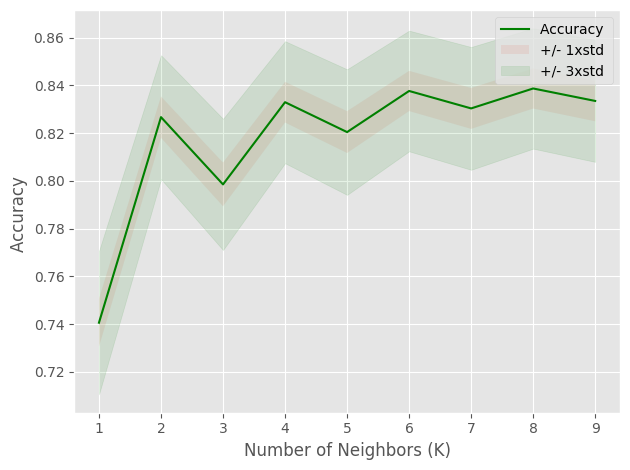

In [ ]:
plt.plot(range(1,Ks),mean_acc,'g')  #g specifies color - green
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [ ]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 0.8387265135699373 with k= 8


**Decision Tree**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

In [ ]:
# Initializing and training the Decision Tree Classifier with Gini impurity
dt_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
dt_gini.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Initializing and training the Decision Tree Classifier with Information Gain (Entropy)
dt_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [ ]:
# Making predictions and evaluating the models
y_pred_gini = dt_gini.predict(X_test)
y_pred_entropy = dt_entropy.predict(X_test)

accuracy_gini = accuracy_score(y_test, y_pred_gini)
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)

accuracy_gini, accuracy_entropy

(0.7473903966597077, 0.7526096033402923)

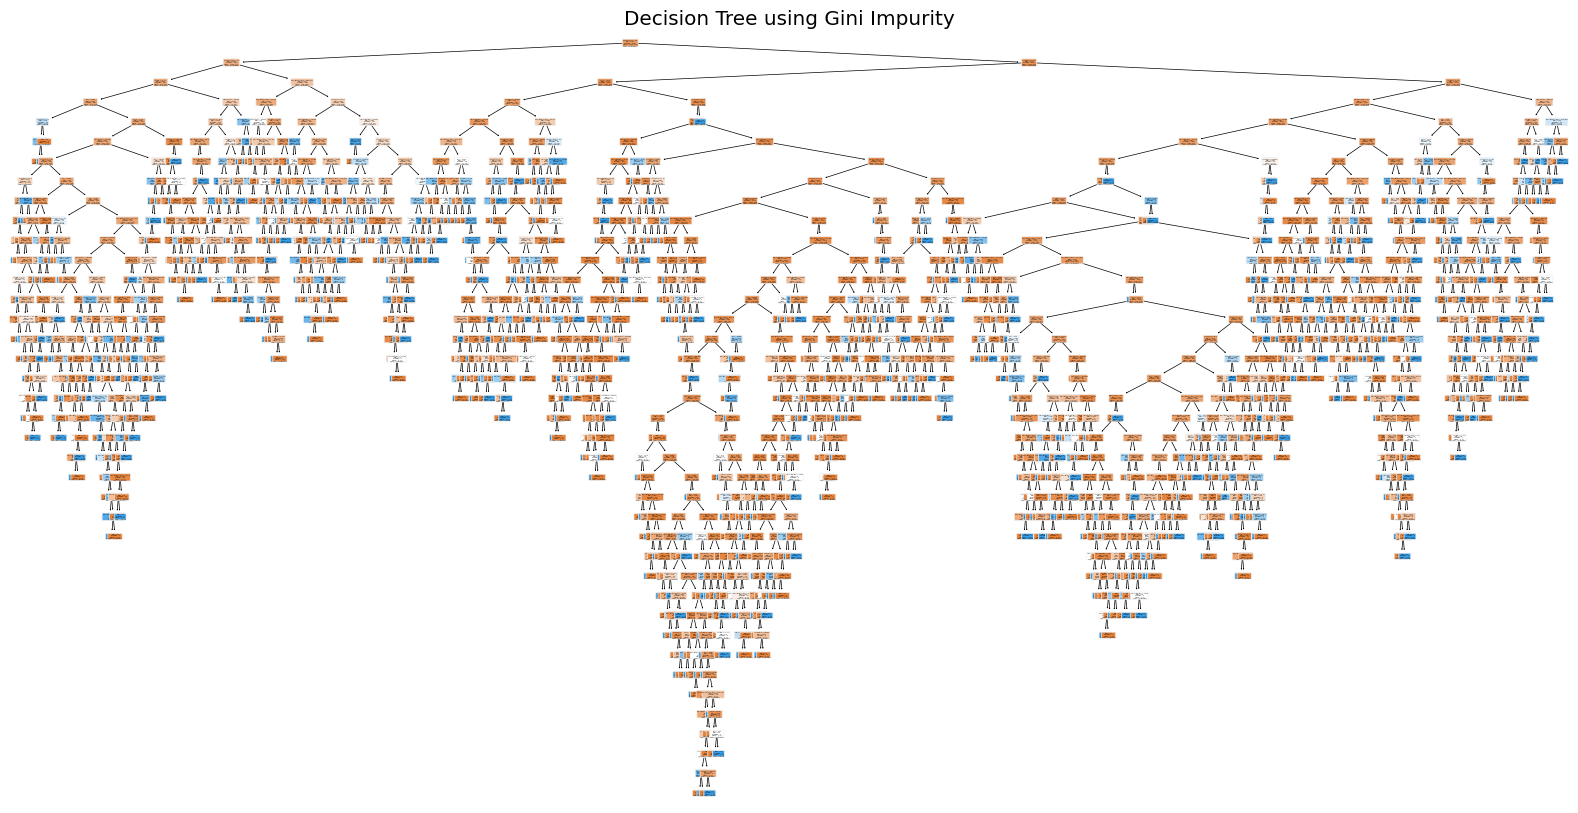

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming dt_gini and dt_entropy are the trained Decision Tree models

# Visualizing the Decision Tree using Gini impurity
plt.figure(figsize=(20,10))
plot_tree(dt_gini, filled=True, feature_names=X.columns, class_names=['No Disease', 'Disease'], rounded=True)
plt.title("Decision Tree using Gini Impurity")
plt.show()
plt.close()

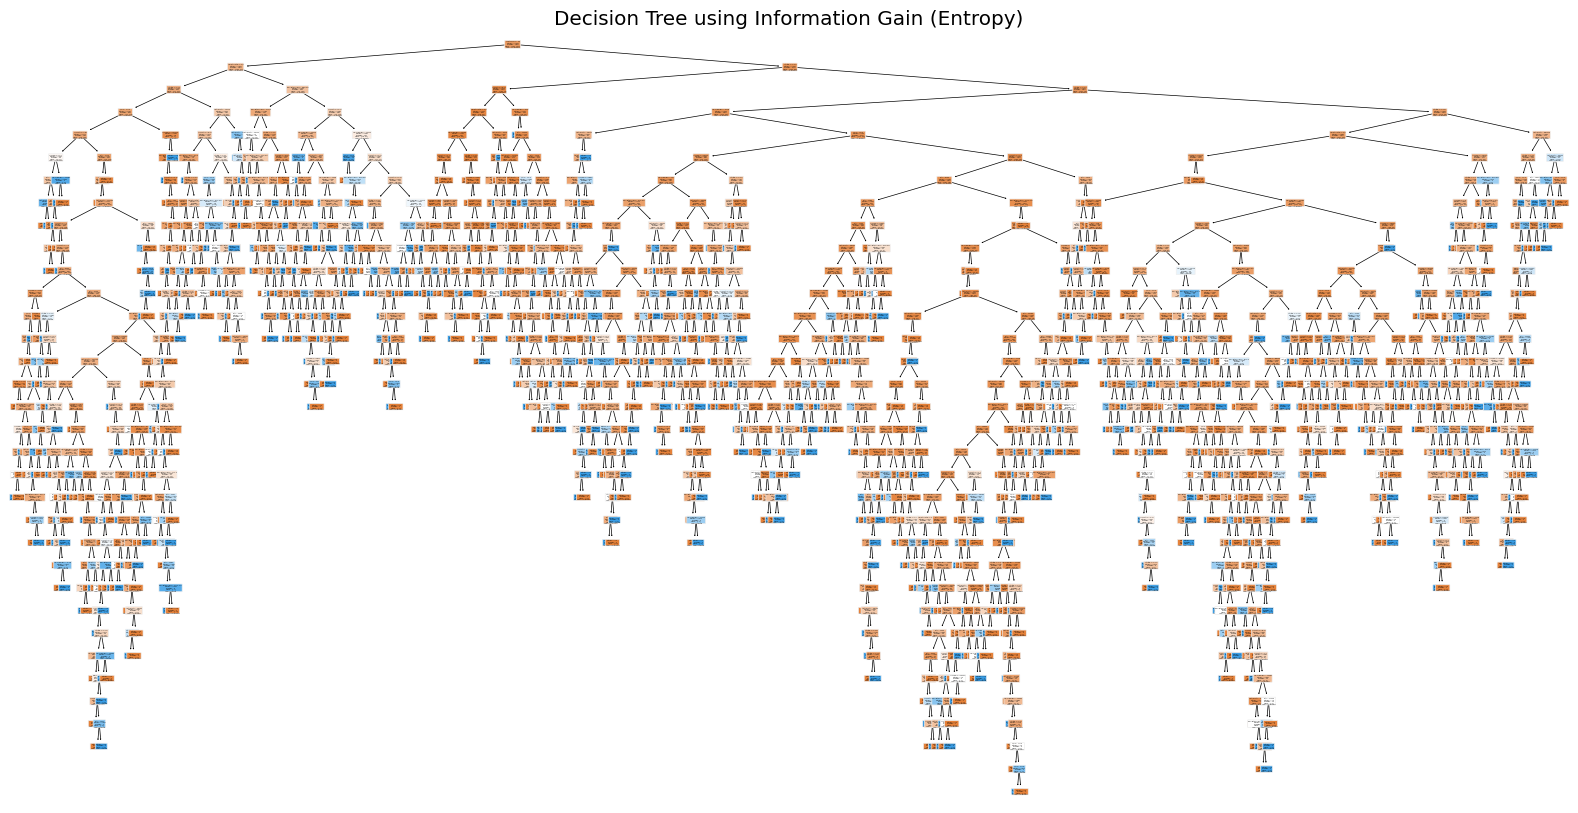

In [ ]:
# Visualizing the Decision Tree using Information Gain (Entropy)
plt.figure(figsize=(20,10))
plot_tree(dt_entropy, filled=True, feature_names=X.columns, class_names=['No Disease', 'Disease'], rounded=True)
plt.title("Decision Tree using Information Gain (Entropy)")
plt.show()
plt.close()

Gini Model Evaluation Metrics:
Confusion Matrix:
 [[1364  252]
 [ 232   68]]
Precision: 0.21
Recall: 0.23
F1 Score: 0.22
ROC AUC: 0.54

Entropy Model Evaluation Metrics:
Confusion Matrix:
 [[1374  242]
 [ 232   68]]
Precision: 0.22
Recall: 0.23
F1 Score: 0.22
ROC AUC: 0.54


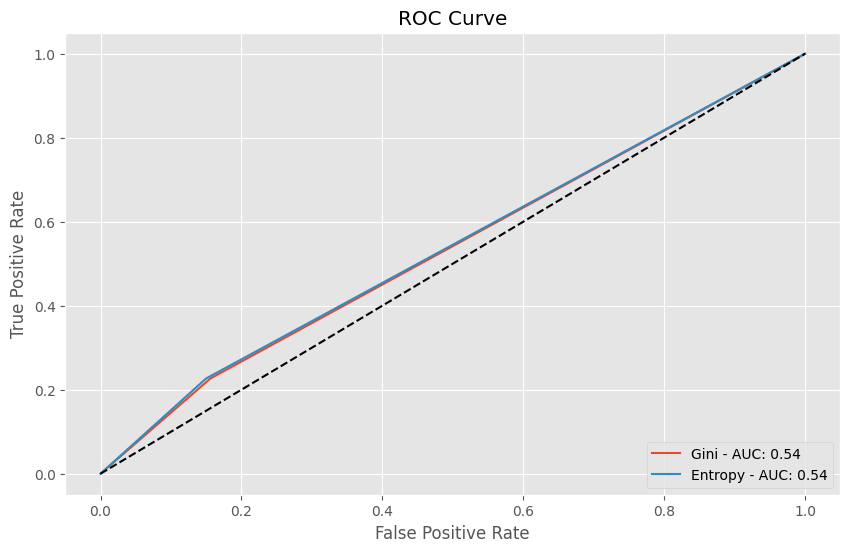

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Assuming y_test, y_pred_gini, and y_pred_entropy are already defined from your model predictions

# Evaluation metrics for Gini model
confusion_gini = confusion_matrix(y_test, y_pred_gini)
precision_gini = precision_score(y_test, y_pred_gini)
recall_gini = recall_score(y_test, y_pred_gini)
f1_score_gini = f1_score(y_test, y_pred_gini)
roc_auc_gini = roc_auc_score(y_test, y_pred_gini)

# Evaluation metrics for Entropy model
confusion_entropy = confusion_matrix(y_test, y_pred_entropy)
precision_entropy = precision_score(y_test, y_pred_entropy)
recall_entropy = recall_score(y_test, y_pred_entropy)
f1_score_entropy = f1_score(y_test, y_pred_entropy)
roc_auc_entropy = roc_auc_score(y_test, y_pred_entropy)

# Printing the evaluation metrics
print("Gini Model Evaluation Metrics:")
print("Confusion Matrix:\n", confusion_gini)
print("Precision: {:.2f}".format(precision_gini))
print("Recall: {:.2f}".format(recall_gini))
print("F1 Score: {:.2f}".format(f1_score_gini))
print("ROC AUC: {:.2f}".format(roc_auc_gini))

print("\nEntropy Model Evaluation Metrics:")
print("Confusion Matrix:\n", confusion_entropy)
print("Precision: {:.2f}".format(precision_entropy))
print("Recall: {:.2f}".format(recall_entropy))
print("F1 Score: {:.2f}".format(f1_score_entropy))
print("ROC AUC: {:.2f}".format(roc_auc_entropy))

# ROC curve calculations
fpr_gini, tpr_gini, _ = roc_curve(y_test, y_pred_gini)
fpr_entropy, tpr_entropy, _ = roc_curve(y_test, y_pred_entropy)

# Plotting ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_gini, tpr_gini, label='Gini - AUC: {:.2f}'.format(roc_auc_gini))
plt.plot(fpr_entropy, tpr_entropy, label='Entropy - AUC: {:.2f}'.format(roc_auc_entropy))
plt.plot([0, 1], [0, 1], 'k--') # Dashed diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
pip install -U imbalanced-learn scikit-learn


In [ ]:
!pip uninstall imbalanced-learn


Found existing installation: imbalanced-learn 0.12.0
Uninstalling imbalanced-learn-0.12.0:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/imbalanced_learn-0.12.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/imblearn/*
Proceed (Y/n)? ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 169, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/uninstall.py", line 105, in run
    uninstall_pathset = req.uninstall(
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/req/req_install.py", line 680, in uninstall
    uninstalled_pathset.remove(auto_confirm, verbose)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/req/req_uninstall.py", line 375, in remove
    if auto_confirm or self._allowed_to_proceed(verbose):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_sm, y_sm = smote.fit_resample(X_train, y_train)

In [ ]:
from sklearn.linear_model import LogisticRegression

LR1 = LogisticRegression(penalty=None).fit(X_sm,y_sm)
print(LR1)


LogisticRegression(penalty=None)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
yhat1 = LR1.predict(X_test)
yhat1


array([0, 1, 1, ..., 1, 1, 0])

In [ ]:
yhat1_prob_temp = LR1.predict_proba(X_test)
yhat1_prob_temp


array([[0.62563767, 0.37436233],
       [0.33833617, 0.66166383],
       [0.43624663, 0.56375337],
       ...,
       [0.36292457, 0.63707543],
       [0.45858367, 0.54141633],
       [0.59160251, 0.40839749]])

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix


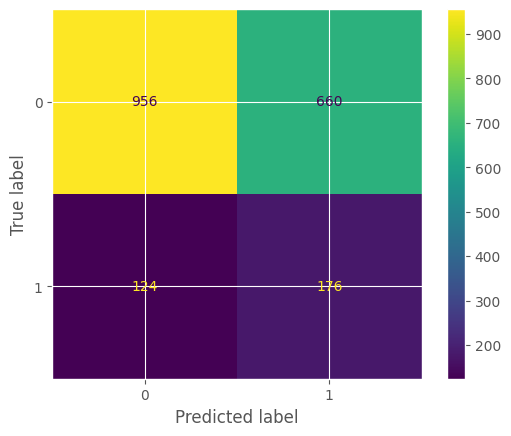

In [ ]:
cm = confusion_matrix(y_test, yhat1)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [ ]:
tn, fp, fn, tp = cm.ravel()

print(tn, fp, fn, tp)

956 660 124 176


In [ ]:
sensitivity = tp / (tp + fn)

specificity = tn / (tn + fp)
print("Sensitivity: ", sensitivity)
print("Specificity: ", specificity)

Sensitivity:  0.02
Specificity:  0.9962871287128713


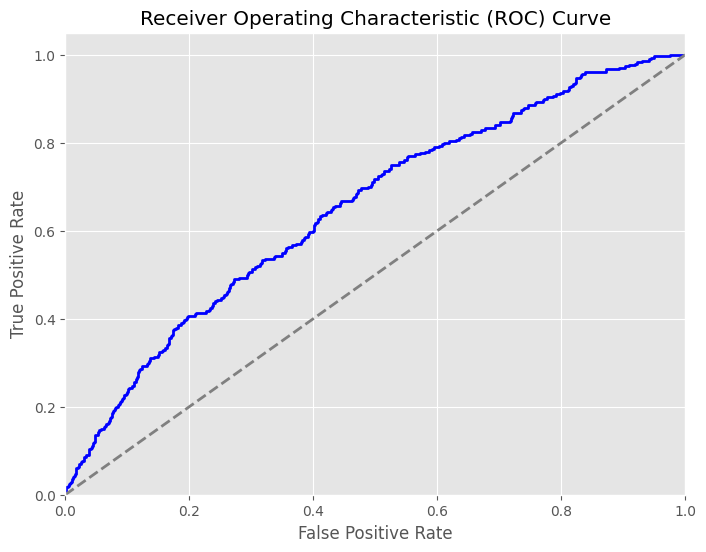

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

# Calculate the ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, yhat1_prob)
roc_auc = roc_auc_score(y_test, yhat1_prob)

# Plotting the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')

plt.show()


In [ ]:
roc_auc

0.6515202145214521